In [7]:
from utils_plot_giocomo import *

Analyze each session

In [ ]:

mouse_sess = sys.argv[1]
files = glob.glob('giocomo_data/' + mouse_sess + '_*.mat')
files.sort()
print(files)

import os
folderName = 'giocomo_leftover'
for nbs1, lentmp1 in [(0.6, 30),]:
    try:
        os.mkdir(folderName)
    except:
        print('folder exists')
    data_all = {}
    sigs = [6000]
    for sigma in sigs:
        (data_matrix, speed1, __, __, good_cells,
        indsnull, __, __, __, __, __, 
        posxx, __, __, __, __, __, __) =  get_data(files, sigma)
        data_all[sigma] = data_matrix
    
    ind = get_ind(mouse_sess, files = files, data_dir = folderName, good_cells = good_cells, indsnull = indsnull, posxx = posxx, nbs = nbs1, lentmp = lentmp1)

    for cmod in np.unique(ind):
        ensemble_ind = ind==cmod
        if (sum(ensemble_ind)>=20):
            num_neurons = len(data_matrix[0,:])
            dgms_all = {}
            coords_ds_all = {}
            coords_1_all = {}
            indstemp_all = {}
            ################## First test each alone #################
            ind_sort = np.argsort(ensemble_ind.astype(int))
            i = -1
            for sp in [10]:
                for dim in [7,]:
                    for k in [1000,]:
                        for sigma in sigs:
                            for eps in [0.9,]:
                                for num_times in [1,]:
                                    for bsqrt in [True]:
                                        data_ensemble = np.sqrt(data_all[sigma][:,ensemble_ind])
                                        for bsp in [False]:
                                            for brad in range(1):
                                                indstemp, speed_times = [], []
                                                for n_points in [800]:
                                                    for nbs in [800]:
                                                        i += 1    
                                                        indstemp = indstemp[:n_points] 
                                                        dgms, rips_real, indstemp, movetimes1, speed_times = get_dgms(data_ensemble, 
                                                            speed1, sp = sp,  eps = eps, k = k, n_points = n_points, speed_times = speed_times, 
                                                            indstemp = indstemp, maxdim = 1, dim = dim, nbs = nbs, num_times = num_times, 
                                                            brad = brad, bsp = bsp)
                                                        
                                                        coords1, coords_ds = get_coords_all(data_ensemble, 
                                                            rips_real, speed_times, indstemp, bPred = False)

                                                        dgms_all[i] = dgms.copy()
                                                        coords_ds_all[i] = coords_ds.copy()
                                                        coords_1_all[i] = coords1.copy()
                                                        indstemp_all[i] = indstemp.copy()
            np.savez(folderName + '/' + mouse_sess + '_ind' + str(cmod),  
                coords_1_all = coords_1_all, coords_ds_all = coords_ds_all, dgms_all = dgms_all)
            

Compute barcode shuffles 


In [ ]:
from utils_plot_giocomo import * 
data_dir = 'giocomo_analyses_250724'
data_dir1 = 'giocomo_analyses_250722'
mouse_sess, file_name, cmod = sys.argv[1], sys.argv[2], int(sys.argv[3])
files = glob.glob('giocomo_data/' + mouse_sess + '_*.mat')
files.sort()
print(files)

numbins = 12
sp = 10
dim = 7
k = 1000
eps = 0.9
t0 = 0
num_shuffles = 100
n_points = 801
nbs = 800
indfile = glob.glob(data_dir1 + '/' + mouse_sess + '_mods.npz')
f = np.load(indfile[0], allow_pickle = True)
ind = f['ind'][()]
f.close()
if (sum(ind==cmod)>=20):
    if len(files)>1:
        (files, data_ensemble_all, speed1, spk1, good_cells, indsnull, speed, 
         data_pos, posx, post, posxx, postt, postrial, gain, 
         contrast, lickt, lickx, dgms_all, coords_ds_all, indstemp_all, times_cube_all, 
         coords1_all, e1) =  load_data_all(mouse_sess, cmod, data_dir, files)

        for it, fi in enumerate(files):
            finame = fi.replace('giocomo_data/', '').replace('.mat', '')
            if fi.find(file_name)>-1:
                num_neurons = len(data_ensemble_all[fi][0,:])
                ################## First test each alone #################
                dgms_shuffles = {}
                speed_times = np.where(speed[fi]>sp)[0]    
                for i in range(num_shuffles):
                    np.random.seed(i)
                    data_shuff = data_ensemble_all[fi][speed_times,:].copy()
                    for n in range(num_neurons):
                        data_shuff[:,n] = np.roll(data_shuff[:,n], int(np.random.rand()*len(data_shuff[:,0])))
                    dgms, rips_real, indstemp, movetimes1, __ = get_dgms(data_shuff, 
                        eps = eps, k = k, n_points = n_points, maxdim = 2, dim = dim, nbs = nbs)
                    dgms_shuffles[i] = dgms.copy()
                np.savez(data_dir + '/' + mouse_sess + '_ind' + str(cmod) + '_shuffles_' + finame, dgms_shuffles = dgms_shuffles)

Plot Barcodes



npH3_0402 1
100
[1.12228847 1.12228847 1.12228847 1.12228847 1.12228847 1.12228847
 1.12228847 1.12228847 1.12228847 1.12228847 1.12228847 1.12228847
 1.12228847 1.12228847 1.12228847 1.12228847 1.12228847 1.12228847
 1.12228847 1.12228847 1.12228847 1.12228847 1.12228847 1.12228847
 1.12228847 1.12228847 1.12228847 1.12228847 1.12228847 1.12228847]
infinity 8.11292748451233
[2.37587038 2.28451803 2.20677951 2.09410444 1.98298737 1.94732198
 1.93649024 1.92628357 1.92548862 1.92002112 1.91839334 1.91214034
 1.91085219 1.90728688 1.9031612  1.89495632 1.8759636  1.87553558
 1.87486637 1.87385431 1.87169412 1.86731237 1.86660331 1.86586723
 1.86526412 1.86468875 1.84394136 1.83114254 1.81055865 1.79908916]
infinity 8.11292748451233
[8.47392726 7.98160529 7.33825707 7.24525619 6.91405272 6.88623214
 5.9769547  5.4641788  5.34023428 5.21880722 4.64908385 3.8643117
 3.73907781 3.70458353 3.70394695 3.61014068 3.58754671 3.50236511
 3.41556358 3.0534302  2.97415161 2.96033359 2.94143951 2.

<Figure size 432x288 with 0 Axes>

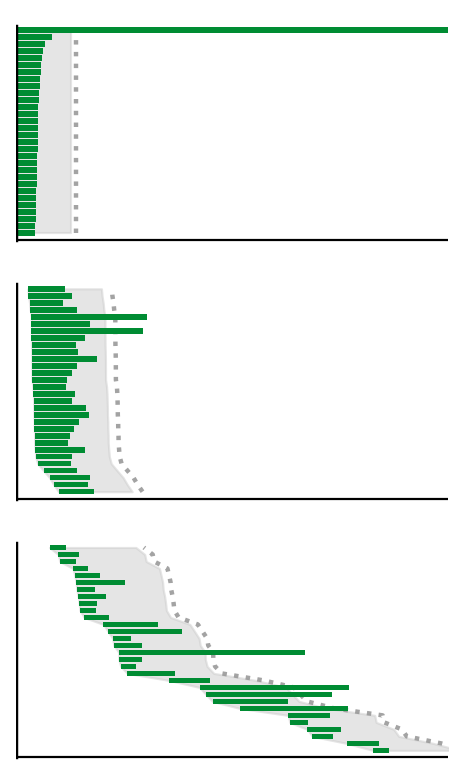

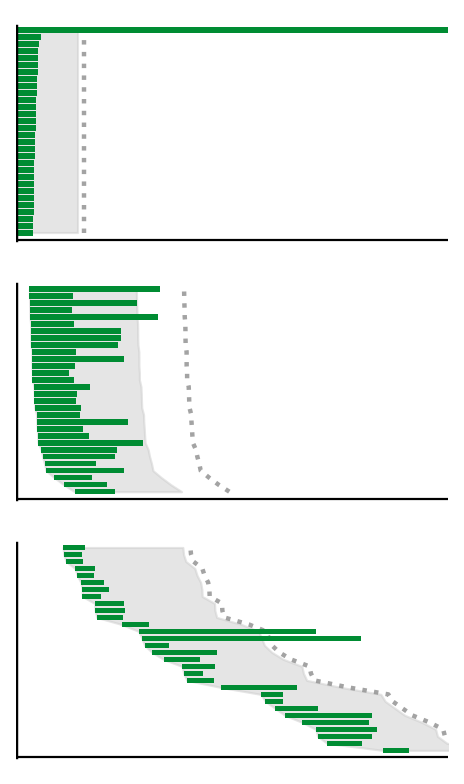

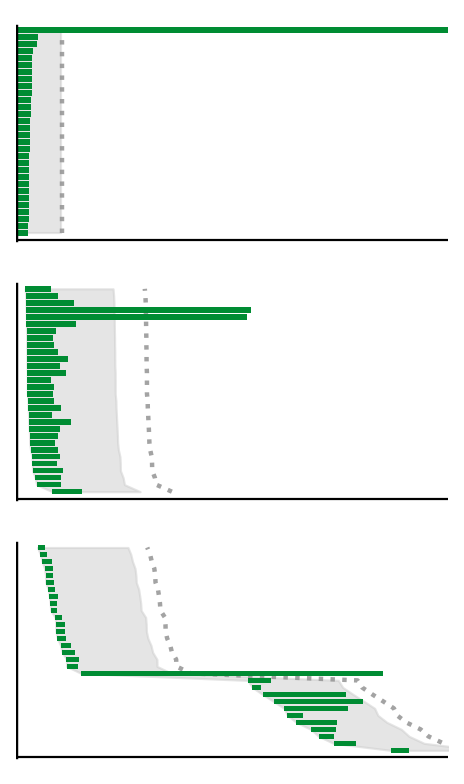

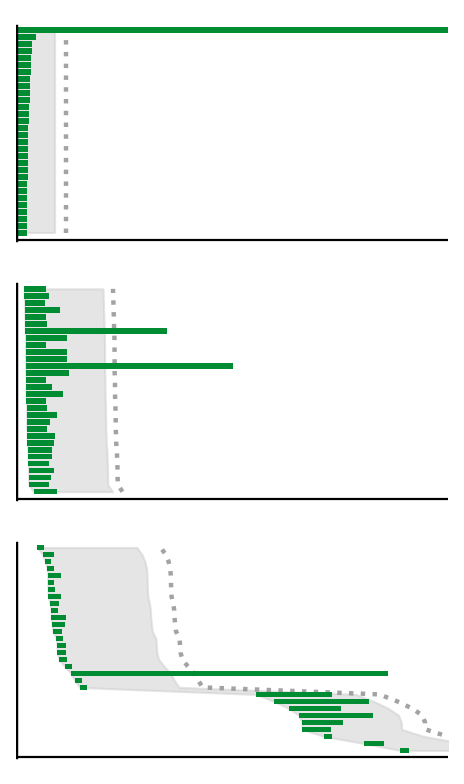

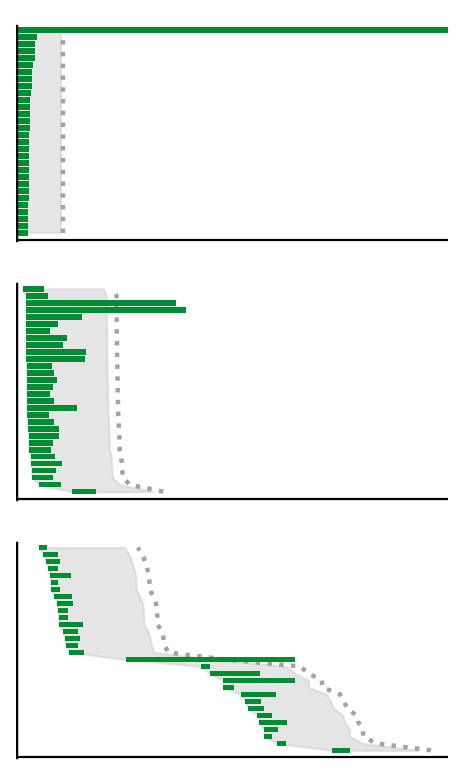

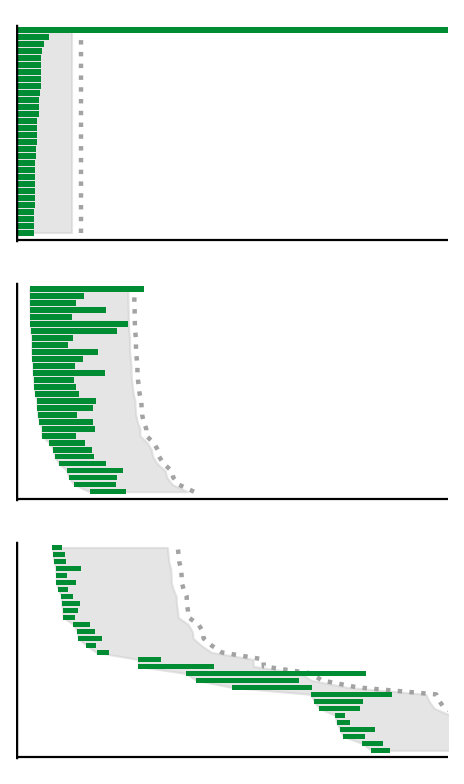

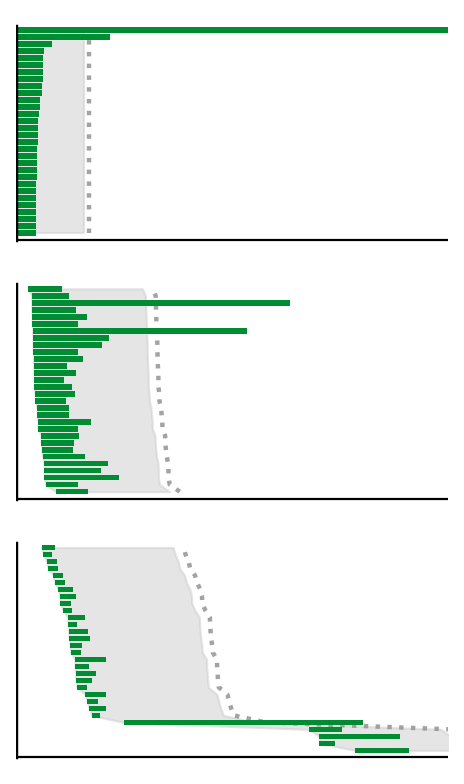

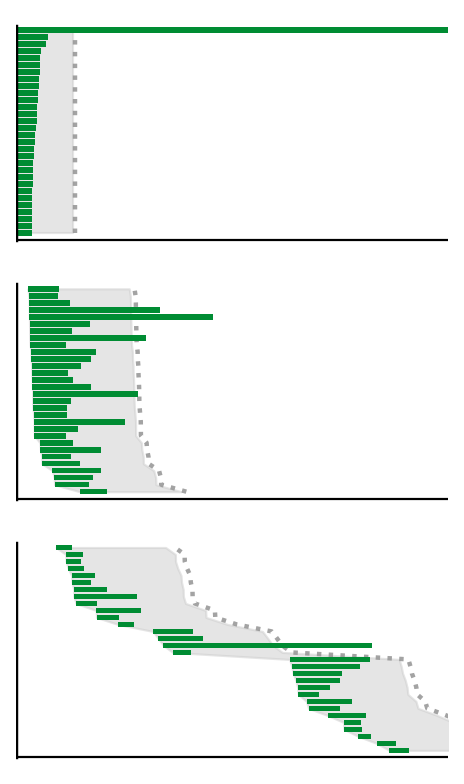

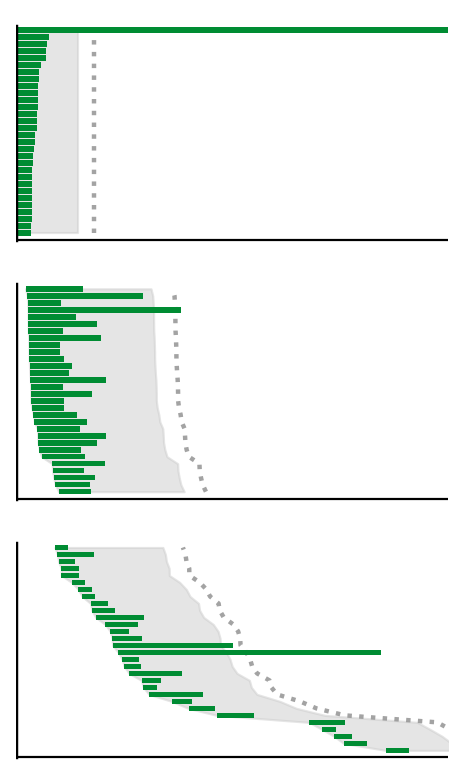

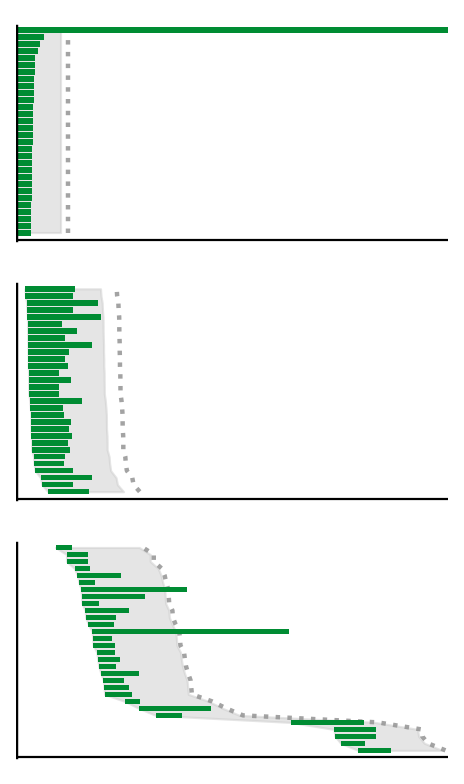

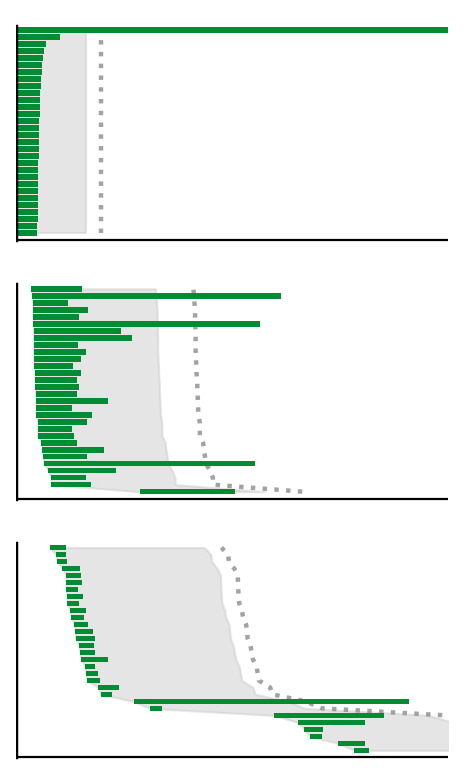

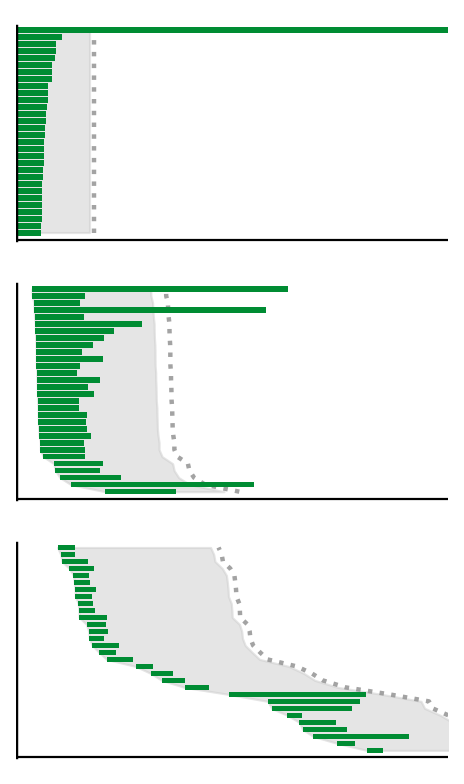

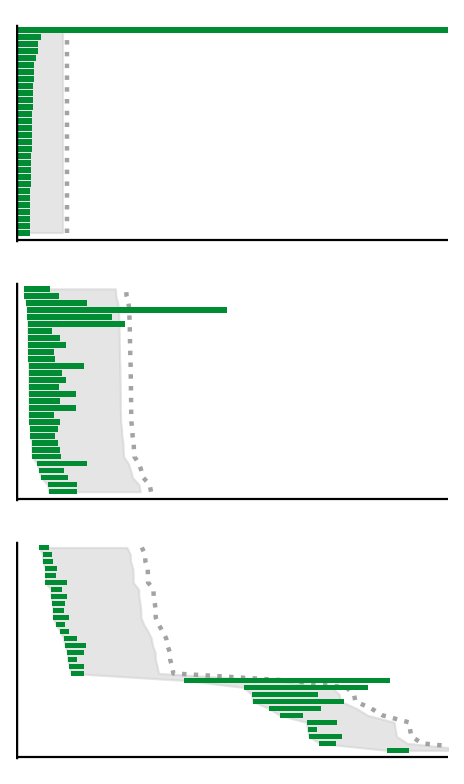

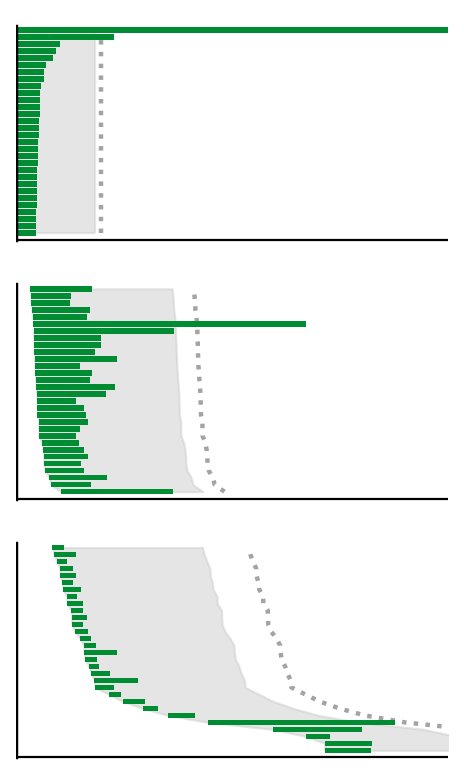

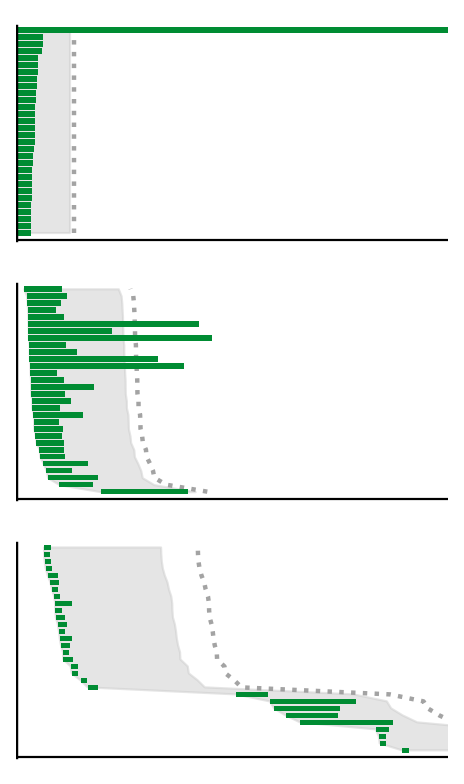

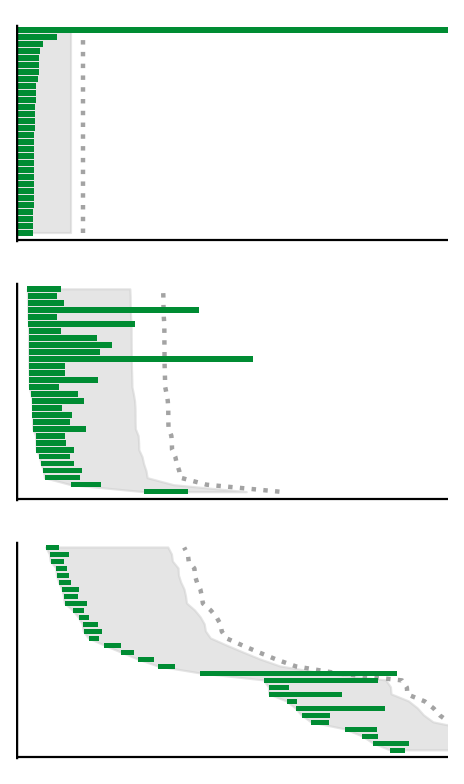

In [7]:
figs_folder = 'giocomo_figures_250723'
data_dir = 'giocomo_analyses_250724'
try:
    os.mkdir(figs_folder)
except:
    print('')
    
mouse_all1 = glob.glob(data_dir + '/*.npz')
mouse_all = []
mouse_ss = {}
for mname in mouse_all1:
    mname = mname.replace(data_dir + '\\', '').replace('.npz','')
    if (mname[-9:].find('ind')>-1):
        mouse_all.extend([mname])
        if mname[:9] not in list(mouse_ss.keys()):
            mouse_ss[mname[:9]] = 1
        else:
            mouse_ss[mname[:9]] += 1
mouse_all = np.array(mouse_all)

toroidal = []
toroidal_files = []
numbins = 12
gains_means_all = {}
gains_std_all = {}
mouse_prev = ''

for i in ['npH3_0402_ind1', 'npI1_0417_ind1', 'npI1_0417_ind3', 'npI3_0420_ind2', 
          'npI1_0418_ind10', 'npJ5_0506_ind21', 'npI5_0415_ind2', 'npJ4_0514_ind2']:
    plt.viridis()
    folder_curr = figs_folder + '/' + i
    try:
        os.mkdir(folder_curr)
    except:
        print('')
    mouse_sess, cmod = i[:9], int(i[13:])
    files = glob.glob('giocomo_data/' + mouse_sess + '_*.mat')
    files.sort()
    if len(files)>1:
        for it, fi in enumerate(files):
            if (((mouse_sess == 'npH3_0402') & ((fi.find('_dark_1')>-1) | (fi.find('_gaincontrast_1')>-1)))|
                ((mouse_sess == 'npI1_0417') & ((fi.find('_baseline_1')>-1) | (fi.find('_dark_1')>-1) | (fi.find('_gaincontrast10_1')>-1)))|
                ((mouse_sess == 'npI1_0418') & ((fi.find('_dark_1')>-1) | (fi.find('_gain_3')>-1)))|
                ((mouse_sess == 'npI3_0420') & ((fi.find('_dark_1')>-1) | (fi.find('_baseline_gain_1')>-1)))|
                ((mouse_sess == 'npI5_0415') & ((fi.find('_baseline_1')>-1)))|
                ((mouse_sess == 'npJ4_0514') & ((fi.find('_dark_1')>-1)))|
                ((mouse_sess == 'npJ5_0506') & ((fi.find('_dark_1')>-1) | (fi.find('_gain_2')>-1)))):
                finame = fi.replace('giocomo_data\\', '').replace('.mat', '')
                shuf_name = data_dir + '/' + mouse_sess + '_ind' + str(cmod) + '_shuffles_' + finame
                bToroidal = len(glob.glob(shuf_name + '*'))>0
                if bToroidal:
                    f = np.load(data_dir + '/' + mouse_sess + '_ind' + str(cmod) + '.npz', allow_pickle = True)
                    dgms_all = f['dgms_all'][()]
                    f.close()
                    print(mouse_sess, cmod)
                    dgms = dgms_all[it][0]
                    plot_barcode(dgms, shuffle_name = shuf_name)
                    plt.savefig(figs_folder + '/' + i + '/' + fi.replace('giocomo_data\\','').replace('.mat', '') 
                                + 'barcode.png', transparent = True, pad_inches = 0.1)
                    plt.savefig(figs_folder + '/' + i + '/' + fi.replace('giocomo_data\\','').replace('.mat', '')
                                + 'barcode.pdf', transparent = True, pad_inches = 0.1)



## Determine toroidal 

In [ ]:
def determine_toroidal(dgms, psqr, phex, thr1 = 0.6):
    g01 = get_score(dgms, dim = 1)            
    g02 = get_score(dgms, dim = 2)            
   
    h0 = np.median(phex)>thr1
    h1 = np.sum((phex > psqr))>len(phex)/2
    h2 = (np.sum(phex>thr1)>len(phex)/2)# & (np.sum(phex > psqr)>len(phex)/2)
    h3 = g01 == 1
    h4 = g02 == 0
    return h0&h1


In [ ]:

from utils_plot_giocomo import *
figs_folder = 'giocomo_figures_250723'
data_dir = 'giocomo_analyses_250724'
try:
    os.mkdir(figs_folder)
except:
    print('')
    
mouse_all1 = glob.glob(data_dir + '/*.npz')
mouse_all = []
mouse_ss = {}
for mname in mouse_all1:
    mname = mname.replace(data_dir + '\\', '').replace('.npz','')
    if (mname[-9:].find('ind')>-1):
        mouse_all.extend([mname])
        if mname[:9] not in list(mouse_ss.keys()):
            mouse_ss[mname[:9]] = 1
        else:
            mouse_ss[mname[:9]] += 1
mouse_all = np.array(mouse_all)

toroidal = []
toroidal_files = []
numbins = 12
gains_means_all = {}
gains_std_all = {}
mouse_prev = ''
phex_all = {}
psqr_all = {}
bToroidal_all = []

for i in mouse_all:
    plt.viridis()
    folder_curr = figs_folder + '/' + i
    try:
        os.mkdir(folder_curr)
    except:
        print('')
    mouse_sess, cmod = i[:9], int(i[13:])
    files = glob.glob('giocomo_data/' + mouse_sess + '_*.mat')
    files.sort()
    if len(files)>1:
        (files, data_ensemble_all, speed1, spk1, good_cells, indsnull, speed, 
         data_pos, posx, post, posxx, postt, postrial, gain, 
         contrast, lickt, lickx, dgms_all, coords_ds_all, indstemp_all, times_cube_all, 
         coords1_all, e1) =  load_data_all(mouse_sess, cmod, data_dir, files)


        coords_aligned_all = {}
        fi_prev = 0
        bFiles = []
        for it, fi in enumerate(files):
            finame = fi.replace('giocomo_data\\', '').replace('.mat', '')
            (data_ensemble, dgms, coords_ds, indstemp, times_cube, coords1) = (data_ensemble_all[fi], dgms_all[it][0], 
                                                                                       coords_ds_all[it], indstemp_all[it], 
                                                                                       times_cube_all[fi], coords1_all[fi])



            psqr, phex, phex0, theta = get_sim_corr(coords_ds[:2,:].T*2*np.pi, data_ensemble[indstemp,:], 
                                                    numbins = numbins, bSqr = True, folder = folder_curr, fname = finame)    

            psqr_all[i + finame] = psqr
            if theta:
                phex_all[i + finame] = phex0
            else:
                phex_all[i + finame] = phex
            bToroidal = np.median(phex_all[i + finame])>0.6
            bToroidal_all.extend([bToroidal])
            if bToroidal:
                print(mouse_sess, cmod, fi)
np.savez('sess_ps', bToroidal_all = bToroidal_all, phex_all = phex_all, psqr_all = psqr_all)

In [15]:
it = 1
thr = 0.682
data_dir = 'giocomo_analyses_250724'
mouse_prev = ''
for mouse_it, i in enumerate(psqr_all):
    mouse_sess = i[:9]
    cmod = i[13:15]
    if cmod[-1] == 'n':
        cmod = cmod[:-1]
    
#    f = np.load(data_dir + '/' + mouse_sess +'_ind' + cmod + '.npz', allow_pickle = True)
#    dgms = f['dgms_all'][()]
#    f.close()
    files = glob.glob('giocomo_data/' + mouse_sess + '*.mat')
    for files_it, fi in enumerate(files):
        finame = fi.replace('giocomo_data\\', '').replace('.mat', '')
        if mouse_sess + '_ind' + cmod + finame == i:
#            print(fi, i)
            break
    bToroidal1 = np.median(phex_all[i])>thr
    bToroidal2 = sum(phex_all[i]>psqr_all[i])>int(len(phex_all[i])/2)
    
    if bToroidal1:
        if mouse_sess != mouse_prev:
            print('')
            mouse_prev = mouse_sess
        print(it, len(psqr_all[i]), fi, np.median(phex_all[i]), bToroidal2)
        it += 1



1 53 giocomo_data\npH3_0402_dark_1.mat 0.7331389211642775 True
2 53 giocomo_data\npH3_0402_gaincontrast_1.mat 0.7480942000241646 True

3 24 giocomo_data\npI1_0414_contrast_2.mat 0.6163959809773124 True

4 44 giocomo_data\npI1_0417_baseline_1.mat 0.8117181271494986 True
5 44 giocomo_data\npI1_0417_dark_1.mat 0.8009384313585837 True
6 44 giocomo_data\npI1_0417_gaincontrast10_1.mat 0.7493587750138313 True
7 41 giocomo_data\npI1_0417_baseline_1.mat 0.7087544072282984 True
8 41 giocomo_data\npI1_0417_dark_1.mat 0.7662394823820071 True
9 41 giocomo_data\npI1_0417_gaincontrast10_1.mat 0.6828960181433281 True

10 40 giocomo_data\npI1_0418_dark_1.mat 0.802385934906302 True
11 40 giocomo_data\npI1_0418_gain_3.mat 0.7605829923815743 True
12 40 giocomo_data\npI1_0418_playback_4.mat 0.607060867303353 True

13 65 giocomo_data\npI3_0420_baseline_gain_1.mat 0.7380591399674021 True
14 65 giocomo_data\npI3_0420_dark_1.mat 0.7998273263604023 True

15 28 giocomo_data\npI5_0413_baseline_1.mat 0.6226238340

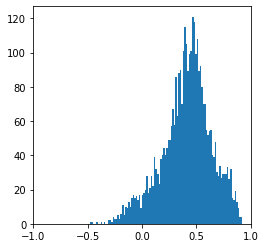

In [35]:
minaxis = np.inf
maxaxis = -np.inf
cs = ['#1f77b4','#ff7f0e', '#2ca02c', '#d62728']
num_neurons = 0
p_all_hex = []
p_median_all_hex = []
p_std_all_hex = []
p_median_all_sqr = []
p_std_all_sqr = []
p_mean_all_hex = []
p_mean_all_sqr = []
p_all_sqr = []
bdark_toroidal = []
for it, i in enumerate(phex_all):
    if i.find('dark')==-1:
        num_neurons += len(psqr_all)
        bdark_toroidal.extend([bToroidal_all[it]])
        
        p_all_hex.extend(phex_all[i])
        p_all_sqr.extend(psqr_all[i])
        
        p_mean_all_hex.extend([np.mean(phex_all[i])])
        p_median_all_hex.extend([np.median(phex_all[i])])
        p_std_all_hex.append([np.quantile(phex_all[i], 0.25),np.quantile(phex_all[i], 0.75)])
        #p_std_all_hex.extend([np.std(phex_all[i])/np.sqrt(len(phex_all[i]))])

        p_mean_all_sqr.extend([np.mean(psqr_all[i])])
        p_median_all_sqr.extend([np.median(psqr_all[i])])
        p_std_all_sqr.append([np.quantile(psqr_all[i], 0.25),np.quantile(psqr_all[i], 0.75)])
        #p_std_all_sqr.extend([np.std(psqr_all[i])/np.sqrt(len(phex_all[i]))])
fig, ax = plt.subplots(1,1)
a = ax.hist(p_all_hex, bins = 100)
ax.set_xlim([-1,1])
ax.set_aspect(1/ax.get_data_ratio())

C:\Users\Finnern\AppData\Local\Temp/ipykernel_7140/3742912112.py:10: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  ax.scatter(xs, [p_median_all_hex[i], p_median_all_sqr[i]], s = 150, marker='.', zorder=-1, alpha  = 0.5, c = cs[bdark_toroidal[i]])
C:\Users\Finnern\AppData\Local\Temp/ipykernel_7140/3742912112.py:11: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  ax.plot(xs, [p_median_all_hex[i], p_median_all_sqr[i]], c = cs[bdark_toroidal[i]], lw = 1, alpha = 0.5, zorder = -2)
C:\Users\Finnern\AppData\Local\Temp/ipykernel_7140/3742912112.py:12: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  ax.plot([xs[0],xs[0]], [p_std_all_hex[i][0], p_std_all_hex[i][1]], c = cs[bdark_toroidal[i]], lw = 0.75, alpha = 0.5, zorder = -2)
C:\Users\Finnern\AppData\Local\Temp/ipykernel_7140/3742912112.py:13: DeprecationWarning: In fut

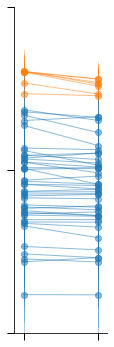

In [34]:
num_mods = len(p_median_all_hex)
bSems = False
cs = ['#1f77b4','#ff7f0e', '#2ca02c', '#d62728']

fig = plt.figure(figsize=(2,6))
ax = fig.add_subplot(111)
xs = [0.01, 0.09]

for i in range(num_mods):
    ax.scatter(xs, [p_median_all_hex[i], p_median_all_sqr[i]], s = 150, marker='.', zorder=-1, alpha  = 0.5, c = cs[bdark_toroidal[i]])
    ax.plot(xs, [p_median_all_hex[i], p_median_all_sqr[i]], c = cs[bdark_toroidal[i]], lw = 1, alpha = 0.5, zorder = -2)    
    ax.plot([xs[0],xs[0]], [p_std_all_hex[i][0], p_std_all_hex[i][1]], c = cs[bdark_toroidal[i]], lw = 0.75, alpha = 0.5, zorder = -2)
    ax.plot([xs[1],xs[1]], [p_std_all_sqr[i][0], p_std_all_sqr[i][1]], c = cs[bdark_toroidal[i]], lw = 0.75, alpha = 0.5, zorder = -2)

#for i in range(num_mods):
#    ax.errorbar(xs, [p_median_all_hex[i],p_median_all_sqr[i]], lw = 1, yerr=[p_std_all_hex[i], p_std_all_sqr[i]], 
#        fmt='none', alpha = 1, zorder=-2,  c = cs[bToroidal_all[i]])

#ax.plot([-0.03,0.1],[0.682,0.682], ls = '--', c = 'gray', zorder = -3, lw = 1.2)
ax.set_xlim([0,0.1])
ax.set_ylim([0,1])

ax.set_xticks(xs)
ys = [0, 0.5,  1]
ax.set_xticklabels(np.zeros(len(xs),dtype=str))
ax.xaxis.set_tick_params(width=1, length =7)
ax.set_yticks(ys)
ax.set_yticklabels(np.zeros(len(ys),dtype=str))
ax.yaxis.set_tick_params(width=1, length =7)
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/(abs(y1-y0))*3.5)

plt.gca().axes.spines['top'].set_visible(False)
plt.gca().axes.spines['right'].set_visible(False)

plt.savefig('dark_median_correlation_all.png', transparent = True, pad_inches = 0.1)
plt.savefig('dark_median_correlation_all.pdf', transparent = True, pad_inches = 0.1)

C:\Users\Finnern\AppData\Local\Temp/ipykernel_7140/31518972.py:10: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  ax.scatter(xs, [p_median_all_hex[i], p_median_all_sqr[i]], s = 150, marker='.', zorder=-1, alpha  = 0.5, c = cs[bdark_toroidal[i]])
C:\Users\Finnern\AppData\Local\Temp/ipykernel_7140/31518972.py:11: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  ax.plot(xs, [p_median_all_hex[i], p_median_all_sqr[i]], c = cs[bdark_toroidal[i]], lw = 1, alpha = 0.5, zorder = -2)
C:\Users\Finnern\AppData\Local\Temp/ipykernel_7140/31518972.py:12: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  ax.plot([xs[0],xs[0]], [p_std_all_hex[i][0], p_std_all_hex[i][1]], c = cs[bdark_toroidal[i]], lw = 0.75, alpha = 0.5, zorder = -2)
C:\Users\Finnern\AppData\Local\Temp/ipykernel_7140/31518972.py:13: DeprecationWarning: In future, it 

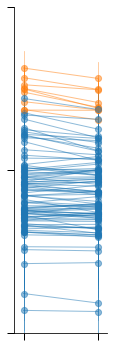

In [36]:
num_mods = len(p_median_all_hex)
bSems = False
cs = ['#1f77b4','#ff7f0e', '#2ca02c', '#d62728']

fig = plt.figure(figsize=(2,6))
ax = fig.add_subplot(111)
xs = [0.01, 0.09]

for i in range(num_mods):
    ax.scatter(xs, [p_median_all_hex[i], p_median_all_sqr[i]], s = 150, marker='.', zorder=-1, alpha  = 0.5, c = cs[bdark_toroidal[i]])
    ax.plot(xs, [p_median_all_hex[i], p_median_all_sqr[i]], c = cs[bdark_toroidal[i]], lw = 1, alpha = 0.5, zorder = -2)    
    ax.plot([xs[0],xs[0]], [p_std_all_hex[i][0], p_std_all_hex[i][1]], c = cs[bdark_toroidal[i]], lw = 0.75, alpha = 0.5, zorder = -2)
    ax.plot([xs[1],xs[1]], [p_std_all_sqr[i][0], p_std_all_sqr[i][1]], c = cs[bdark_toroidal[i]], lw = 0.75, alpha = 0.5, zorder = -2)

#for i in range(num_mods):
#    ax.errorbar(xs, [p_median_all_hex[i],p_median_all_sqr[i]], lw = 1, yerr=[p_std_all_hex[i], p_std_all_sqr[i]], 
#        fmt='none', alpha = 1, zorder=-2,  c = cs[bToroidal_all[i]])

#ax.plot([-0.03,0.1],[0.682,0.682], ls = '--', c = 'gray', zorder = -3, lw = 1.2)
ax.set_xlim([0,0.1])
ax.set_ylim([0,1])

ax.set_xticks(xs)
ys = [0, 0.5,  1]
ax.set_xticklabels(np.zeros(len(xs),dtype=str))
ax.xaxis.set_tick_params(width=1, length =7)
ax.set_yticks(ys)
ax.set_yticklabels(np.zeros(len(ys),dtype=str))
ax.yaxis.set_tick_params(width=1, length =7)
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/(abs(y1-y0))*3.5)

plt.gca().axes.spines['top'].set_visible(False)
plt.gca().axes.spines['right'].set_visible(False)

plt.savefig('non_dark_median_correlation_all.png', transparent = True, pad_inches = 0.1)
plt.savefig('non_dark_median_correlation_all.pdf', transparent = True, pad_inches = 0.1)



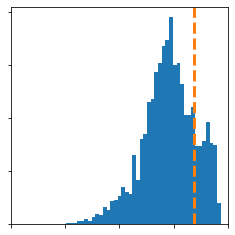

In [33]:
figs_folder = 'giocomo_figures_250723'
fig, ax = plt.subplots(1,1)
#a = ax.hist(p_all_hex, bins = np.linspace(-1,1, 35))
a = ax.hist(p_all_hex, bins = np.linspace(-1,1, 60))
ylims = ax.get_ylim()
ax.plot([0.682,0.682], ylims, ls = '--', lw = 3)
ax.set_xlim([-1,1])
ax.set_ylim(ylims)
ax.set_aspect(1/ax.get_data_ratio())

xs = [-1,-0.5,0.0, 0.5, 1.0]
ax.set_xticks(xs)
ax.set_xticklabels(np.zeros(len(xs),dtype=str))
ys = [0, 30, 60, 90, 120]
ax.set_yticks(ys)
ax.set_yticklabels(np.zeros(len(ys),dtype=str))
fig.savefig(figs_folder + '/dark_correlation_all.png', pad_inches = 0.1, transparent = True)
fig.savefig(figs_folder + '/dark_correlation_all.pdf', pad_inches = 0.1, transparent = True)

## Align and plot coordinates

In [ ]:
f = np.load('sess_ps.npz', allow_pickle = True)
bToroidal_all = f['bToroidal_all']
phex_all = f['phex_all'][()]
psqr_all = f['psqr_all'][()]
f.close()




npI3_0420 ind 2 65
npI3_0420_baseline_gain_1
False
0.6914838224107165 0.7380591399674021 0.5803562808391802


<Figure size 432x288 with 0 Axes>

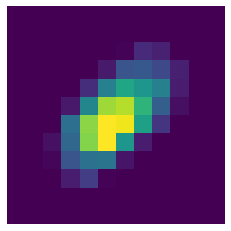

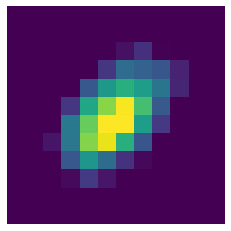

npI3_0420_dark_1
True
0.778293564736524 0.6779433930115515 0.7998273263604023


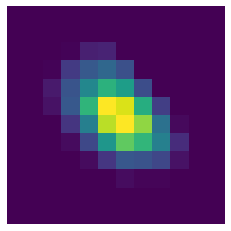

C:\Users\Finnern\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Finnern\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Finnern\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or n

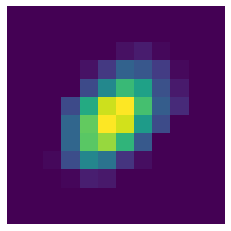

In [341]:
figs_folder = 'giocomo_figures_250723'
data_dir = 'giocomo_analyses_250724'
try:
    os.mkdir(figs_folder)
except:
    print('')
    
mouse_all1 = glob.glob(data_dir + '/*.npz')
mouse_all = []
mouse_ss = {}
for mname in mouse_all1:
    mname = mname.replace(data_dir + '\\', '').replace('.npz','')
    if (mname[-9:].find('ind')>-1):
        mouse_all.extend([mname])
        if mname[:9] not in list(mouse_ss.keys()):
            mouse_ss[mname[:9]] = 1
        else:
            mouse_ss[mname[:9]] += 1
mouse_all = np.array(mouse_all)

toroidal = []
toroidal_files = []
numbins = 12
gains_means_all = {}
gains_std_all = {}
mouse_prev = ''
times_cube_all = {}
indstemp_all = {}
spk_all = {}
coords_aligned_all = {}
coords_ds_aligned_all = {}
posxx_all ={}
for i in ['npH3_0402_ind1', 'npI1_0417_ind1', 'npI1_0417_ind3', 'npI3_0420_ind2', 
          'npI1_0418_ind10', 'npJ5_0506_ind21', 'npI5_0415_ind2', 'npJ4_0514_ind2']:
    plt.viridis()
    folder_curr = figs_folder + '/' + i
    try:
        os.mkdir(folder_curr)
    except:
        print('')
    mouse_sess, cmod = i[:9], int(i[13:])
    files = glob.glob('giocomo_data/' + mouse_sess + '_*.mat')
    files.sort()

    (files, data_ensemble_all, speed1, spk1, good_cells, indsnull, speed, 
     data_pos, posx, post, posxx, postt, postrial, gain, 
     contrast, lickt, lickx, dgms_all, coords_ds_all, indstemp_all, times_cube_all, 
     coords1_all, e1) =  load_data_all(mouse_sess, cmod, data_dir, files)

    fi_prev = 0
    bFiles = []
    for it, fi in enumerate(files):
        finame = fi.replace('giocomo_data\\', '').replace('.mat', '')
        print(finame)
        (data_ensemble, dgms, coords_ds, indstemp, times_cube, coords1) = (data_ensemble_all[fi], dgms_all[it][0], 
                                                                                   coords_ds_all[it], indstemp_all[it], 
                                                                                   times_cube_all[fi], coords1_all[fi])

        psqr, phex, phex0, theta = get_sim_corr(coords_ds[:2,:].T*2*np.pi, data_ensemble[indstemp,:], 
                                    numbins = numbins, bSqr = True, folder = folder_curr, fname = finame)    

        mcstemp, mtot_all = get_ratemaps_center(coords_ds[:2,:].T*2*np.pi, data_ensemble[indstemp,:], numbins = numbins,)
          
        plot_centered_ratemaps(coords_ds[:2,:].T*2*np.pi, data_ensemble[indstemp,:], mcstemp, numbins)
        plt.show()

        toroidal.extend([i])
        bFiles.extend([fi])
        if fi_prev == 0:
            if (mouse_ss[mouse_sess] > 1) & (mouse_sess == mouse_prev):
                coords_aligned, comb, pshift = align_coords(coords1[:,:2], coords_prev[fi][:,:2], theta_i_prev, theta)
                coords_ds_aligned = align(coords_ds.T*2*np.pi, comb, pshift)
                coords_ds_aligned = coords_ds_aligned.T/2*np.pi
                theta = theta_i_prev
            else:
                coords_aligned = coords1.copy()
                coords_ds_aligned = coords_ds.copy()
                theta_i_prev = theta
            data_prev = data_ensemble.copy()
            theta_prev = theta
        else:
            coords_aligned, comb, pshift = align_coords(coords1[:,:2], coords_aligned_all[files[0]][:,:2], 
                                          theta_prev, theta, times = [], times_cube = times_cube,
                                          indstemp = indstemp, data_ensemble1 = data_ensemble, 
                                          data_ensemble2 = data_ensemble_all[files[0]])
            coords_ds_aligned = align(coords_ds.T*2*np.pi, comb, pshift)
            coords_ds_aligned = coords_ds_aligned.T/2*np.pi

        mcstemp, mtot_all = get_ratemaps_center(coords_aligned[indstemp,:2], 
                                                data_ensemble[indstemp,:], 
                                                numbins = numbins,)
        plot_centered_ratemaps(coords_aligned[indstemp,:2], data_ensemble[indstemp,:], mcstemp, numbins)
        plt.show()
        fi_prev += 1
        coords_aligned_all[fi] = coords_aligned.copy()
        coords_ds_aligned_all[i + finame.replace(mouse_sess,'')] = coords_ds_aligned.copy()
        indstemp_all[i + finame.replace(mouse_sess,'')]  = indstemp.copy()
        spk_all[i + finame.replace(mouse_sess,'')]  = data_ensemble
        times_cube_all[i + finame.replace(mouse_sess,'')] = times_cube.copy()
        posxx_all[i + finame.replace(mouse_sess,'')] = posxx[fi].copy()

In [ ]:
#from utils_plot_giocomo import *
figs_folder = 'giocomo_figures_250723'
data_dir = 'giocomo_analyses_250724'
try:
    os.mkdir(figs_folder)
except:
    print('')
    
mouse_all1 = glob.glob(data_dir + '/*.npz')
mouse_all = []
mouse_ss = {}
for mname in mouse_all1:
    mname = mname.replace(data_dir + '\\', '').replace('.npz','')
    if (mname[-9:].find('ind')>-1):
        mouse_all.extend([mname])
        if mname[:9] not in list(mouse_ss.keys()):
            mouse_ss[mname[:9]] = 1
        else:
            mouse_ss[mname[:9]] += 1
mouse_all = np.array(mouse_all)

toroidal = []
toroidal_files = []
numbins = 12
gains_means_all = {}
gains_std_all = {}
mouse_prev = ''

for i in mouse_all:
    plt.viridis()
    folder_curr = figs_folder + '/' + i
    try:
        os.mkdir(folder_curr)
    except:
        print('')
    mouse_sess, cmod = i[:9], int(i[13:])
    files = glob.glob('giocomo_data/' + mouse_sess + '_*.mat')
    files.sort()
    if (len(files)>1) & (i not in mouse_prev_all):
        bToroidal = False
        for it, fi in enumerate(files):
            finame = fi.replace('giocomo_data\\', '').replace('.mat', '')
            bToroidal = determine_toroidal(dgms, 
                               psqr_all[i + finame].copy(), 
                               phex_all[i + finame].copy(),
                               thr1 = 0.6)
            if bToroidal:
                break
        if bToroidal:
            
            (files, data_ensemble_all, speed1, spk1, good_cells, indsnull, speed, 
             data_pos, posx, post, posxx, postt, postrial, gain, 
             contrast, lickt, lickx, dgms_all, coords_ds_all, indstemp_all, times_cube_all, 
             coords1_all, e1) =  load_data_all(mouse_sess, cmod, data_dir, files)


            coords_aligned_all = {}
            fi_prev = 0
            bFiles = []
            for it, fi in enumerate(files):
                finame = fi.replace('giocomo_data\\', '').replace('.mat', '')
                (data_ensemble, dgms, coords_ds, indstemp, times_cube, coords1) = (data_ensemble_all[fi], dgms_all[it][0], 
                                                                                           coords_ds_all[it], indstemp_all[it], 
                                                                                           times_cube_all[fi], coords1_all[fi])



#                psqr, phex, phex0, theta = get_sim_corr(coords_ds[:2,:].T*2*np.pi, data_ensemble[indstemp,:], 
#                                                        numbins = numbins, bSqr = True, folder = folder_curr, fname = finame)    

#                if theta:
#                    bToroidal = determine_toroidal(dgms, psqr, phex0)
#                else:
#                    bToroidal = determine_toroidal(dgms, psqr, phex)
                if bToroidal:
                    mcstemp, mtot_all = get_ratemaps_center(coords_ds[:2,:].T*2*np.pi, data_ensemble[indstemp,:], numbins = numbins,)
                    plot_centered_ratemaps(coords_ds[:2,:].T*2*np.pi, data_ensemble[indstemp,:], mcstemp, numbins)
                    plt.show()

                    toroidal.extend([i])
                    bFiles.extend([fi])
                    if fi_prev == 0:
                        if (mouse_ss[mouse_sess] > 1) & (mouse_sess == mouse_prev):
                            coords_aligned = align_coords(coords1[:,:2], coords_prev[fi][:,:2], theta_i_prev, theta)
                            mcstemp, mtot_all = get_ratemaps_center(coords_aligned[indstemp,:2], 
                                                                    data_ensemble[indstemp,:], 
                                                                    numbins = numbins,)
                            plot_centered_ratemaps(coords_aligned[indstemp,:2], data_ensemble[indstemp,:], mcstemp, numbins)
                            plt.show()

                            theta = theta_i_prev
                        else:
                            coords_aligned = coords1.copy()
                            theta_i_prev = theta
                        data_prev = data_ensemble.copy()
                        theta_prev = theta
                    else:
                        coords_aligned = align_coords(coords1[:,:2], coords_aligned_all[files[0]][:,:2], 
                                                      theta_prev, theta, times = [], times_cube = times_cube,
                                                      indstemp = indstemp, data_ensemble1 = data_ensemble, 
                                                      data_ensemble2 = data_ensemble_all[files[0]])
                    fi_prev += 1

                    coords_aligned_all[fi] = coords_aligned.copy()
                    shuf_name = ''# data_dir + '/' + mouse_sess + '_ind' + str(cmod) + '_shuffles_' + finame
                    plot_barcode(mouse_sess, cmod, folder_curr, dgms, finame, shuf_name)
                else:
                    coords_aligned_all[fi] = coords1.copy()
                    print(fi + ' not toroidal')


            if i in toroidal:

                toroidal_files.append(bFiles)
                coords_concat = np.zeros((1,2))
                data_ensemble = np.zeros((1,len(data_ensemble[0,:])))
                for fi in files:
                    coords_concat = np.concatenate((coords_concat, coords_aligned_all[fi][:,:2]),0)
                    data_ensemble = np.concatenate((data_ensemble, data_ensemble_all[fi]),0)
                coords_concat = coords_concat[1:,:]             
                data_ensemble = data_ensemble[1:,:]

                plot_2dcoords(mouse_sess, cmod, speed, coords_concat, posxx, postt,  gain, contrast, postrial, files, folder_curr, )


                acorr_real, acorr_sim, acorr_corr = plot_sim_acorr(data_ensemble, coords_concat, 
                                                   posxx, postrial, files, folder_curr, 
                                                   speed, sp = 10, theta = theta_prev, numbins = numbins)

                gains_means, gains_std =  plot_gain(coords_concat, postt, posxx, postrial, speed, gain, contrast, 
                                                    sp = -np.inf, folder = folder_curr, files = files)
                gains_means_all[i + fi], gains_std_all[i + fi] = gains_means.copy(), gains_std.copy()


                plot_trajectories(posxx, coords_concat, postrial, gain, theta_prev, folder_curr, files)

                plot_toroidal_ratemaps(mouse_sess, data_ensemble, files, coords_concat, speed, theta_prev, folder_curr)

                plot_phase_stats(mouse_sess, cmod, coords_concat, speed, data_ensemble, folder_curr, numangsint = 16, files = files)
                coords_prev = coords_aligned_all#[files[0]]
                mouse_prev = mouse_sess


## Make video

In [ ]:
times_cube_fi_all = {}
indstemp_fi_all = {}
spk_all = {}
posxx_all ={}
for i in ['npI3_0420_ind2',]:
    plt.viridis()
    folder_curr = figs_folder + '/' + i
    try:
        os.mkdir(folder_curr)
    except:
        print('')
    mouse_sess, cmod = i[:9], int(i[13:])
    files = glob.glob('giocomo_data/' + mouse_sess + '_*.mat')
    files.sort()

    (files, data_ensemble_all, speed1, spk1, good_cells, indsnull, speed, 
     data_pos, posx, post, posxx, postt, postrial, gain, 
     contrast, lickt, lickx, dgms_all, coords_ds_all, indstemp_all, times_cube_all, 
     coords1_all, e1) =  load_data_all(mouse_sess, cmod, data_dir, files)

    fi_prev = 0
    bFiles = []
    for it, fi in enumerate(files):
        finame = fi.replace('giocomo_data\\', '').replace('.mat', '')
        print(finame)
        (data_ensemble, dgms, coords_ds, indstemp, times_cube, coords1) = (data_ensemble_all[fi], dgms_all[it][0], 
                                                                                   coords_ds_all[it], indstemp_all[it], 
                                                                                   times_cube_all[fi], coords1_all[fi])

        indstemp_fi_all[i + finame.replace(mouse_sess,'')]  = indstemp.copy()
        spk_all[i + finame.replace(mouse_sess,'')]  = data_ensemble.copy()
        times_cube_fi_all[i + finame.replace(mouse_sess,'')] = times_cube.copy()
        posxx_all[i + finame.replace(mouse_sess,'')] = posxx[fi].copy()
        
gain_all = {}
contrast_all = {}
postrial_all = {}
postt_all =  {}
for i in ['npI3_0420_ind2',]:
    fi_prev = 0
    bFiles = []
    for it, fi in enumerate(files):
        finame = fi.replace('giocomo_data\\', '').replace('.mat', '')
        postt_all[i + finame.replace(mouse_sess,'')]  = postt[fi].copy()
        postrial_all[i + finame.replace(mouse_sess,'')] = postrial[fi]
        gain_all[i + finame.replace(mouse_sess,'')] = gain[fi]
        contrast_all[i + finame.replace(mouse_sess,'')] = contrast[fi]
        

In [424]:
fi1 = list(spk_all.keys())[0]
tt = postt_all[fi1]
headpos = posxx_all[fi1].copy()
sspk1 = spk_all[fi1].copy()
coords_ds1 = coords_ds_aligned_all[fi1][:2,:].copy()
indstemp1 = indstemp_fi_all[fi1].copy()

starttime =52000
num_frames = 4000
times = np.arange(0,len(sspk1),5)

coordsnew_mod11,coordsbox1 = get_coords_distribution1(sspk1[:,:], 
                                       gaussian_filter1d(sspk1,sigma = 5, axis = 0)[times,:][movetimes0,:], 
                                       coords_ds1, indstemp1, 
                                       starttime = starttime, num_frames = num_frames)


npI3_0420_ind2_baseline_gain_1


<Figure size 432x288 with 0 Axes>

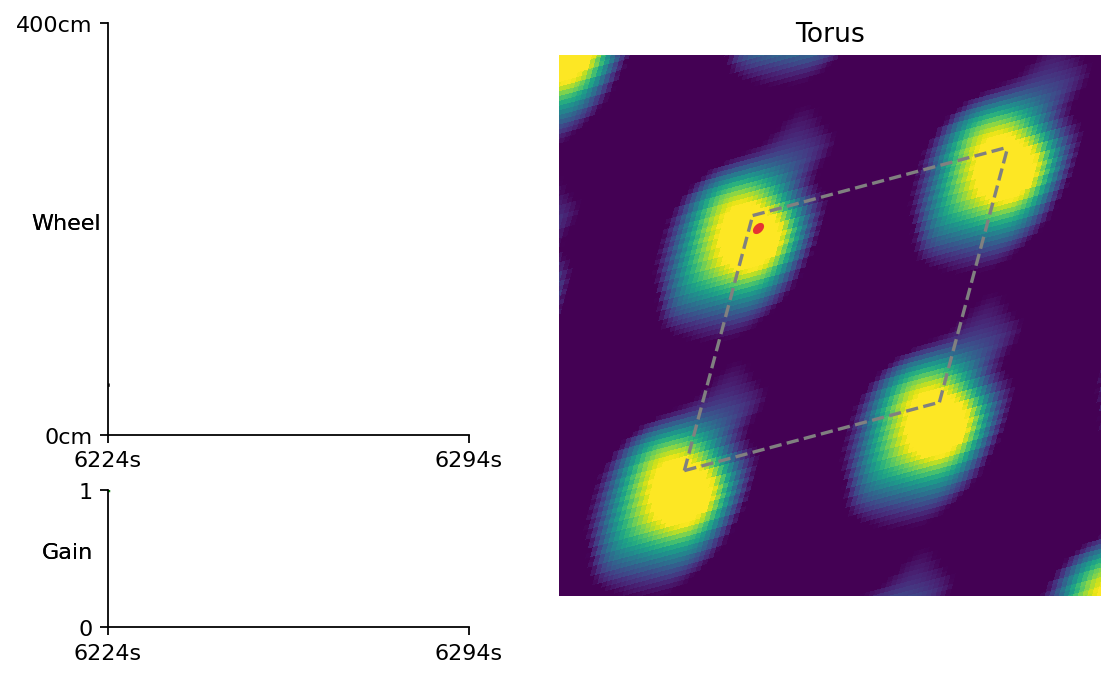

In [456]:
from matplotlib import animation, cm, transforms, pyplot as plt
from IPython.display import HTML
from matplotlib.collections import PathCollection


headpos1 = headpos[times][movetimes0].copy()
gainscurr = gain_all[fi1][postrial_all[fi1]-1][times][movetimes0]
coordsbox11 = (1-coordsbox1)*2*np.pi/3+2*np.pi/3

coordsbox11
coordsbox22 = (1-coordsbox2)*2*np.pi/3+2*np.pi/3

tt1 = tt[times][movetimes0].copy()
tt1[:starttime] = tt[starttime]
plt.viridis()

fig = plt.figure(figsize = (8,5), dpi = 160)#,constrained_layout=True)
gs = fig.add_gridspec(2, 2, height_ratios = [3,1],width_ratios = [1,1.5])

ax = fig.add_subplot(gs[0, 0])
img, = ax.plot(tt[:500],headpos[:500], c = 'k')
minh, maxh = 0, 400
ys = [minh, maxh]
ax.set_ylim(minh, maxh)
ax.set_xlim( tt[0], tt[500])
plt.gca().axes.spines['top'].set_visible(False)
plt.gca().axes.spines['right'].set_visible(False)



ax0 = fig.add_subplot(gs[1, 0])
#img00, = ax0.plot(tt[:500],contrastcurr[:500], c = 'r', lw = 1.1, alpha = 0.5)
img01, = ax0.plot(tt[:500],gainscurr[:500], c = 'g', lw = 2, alpha = 1)
minh0, maxh0 = 0, 1
ys0 = [minh0, maxh0]
ax0.set_ylim(minh0, maxh0)
ax0.set_xlim( tt[0], tt[500])
plt.gca().axes.spines['top'].set_visible(False)
plt.gca().axes.spines['right'].set_visible(False)


ax2 = fig.add_subplot(gs[:, 1])
ax2.set_xlim( np.sin(np.pi/12)*2*np.pi, np.cos(np.pi/12)*2*np.pi)
ax2.set_ylim( np.sin(np.pi/12)*2*np.pi, np.cos(np.pi/12)*2*np.pi)
ax2.set_aspect('equal','box')
ax2.axis('off')
cc_comb = np.concatenate((coordsnew_mod22[0,:,:],coordsnew_mod22[0,:,:],coordsnew_mod22[0,:,:]),1)
cc_comb = np.concatenate((cc_comb,cc_comb,cc_comb),0)
img2 = ax2.imshow(cc_comb, origin = 'lower',
                  extent = [0,2*np.pi, 0, 2*np.pi], vmin = 0, vmax = 10)
img3 = ax2.scatter([],[], c = [[0.7,0.7,0.7]], s = 5, alpha = 0.6)
img4 = ax2.scatter([],[], c = [[0.9, 0.2,0.2]], s = 15, alpha = 1)

ax2.plot([2/3*np.pi,2/3*np.pi],[2/3*np.pi,4/3*np.pi], c = [0.5,0.5,0.5], ls = '--')
ax2.plot([2/3*np.pi, 4/3*np.pi],[2/3*np.pi,2/3*np.pi], c = [0.5,0.5,0.5], ls = '--')

ax2.plot([4/3*np.pi,4/3*np.pi],[2/3*np.pi,4/3*np.pi], c = [0.5,0.5,0.5], ls = '--')
ax2.plot([2/3*np.pi, 4/3*np.pi],[4/3*np.pi,4/3*np.pi], c = [0.5,0.5,0.5], ls = '--')


im = [img, img01, img2,img3, img4, ]

r_box = transforms.Affine2D().skew_deg(15,15)
for x in (ax2.images + ax2.lines + ax2.collections + ax2.texts):
#          ax3.images + ax3.lines + ax3.collections + ax3.texts):
    trans = x.get_transform()
    x.set_transform(r_box+trans) 
    if isinstance(x, PathCollection):
        transoff = x.get_offset_transform()
        x._transOffset = r_box+transoff     


fps = 25
height, width = 1600, 1600
ax2.set_title('Torus')
ax.text(tt1[starttime]-15, 200, 'Wheel')
ax0.text(tt1[starttime]-13, 0.5, 'Gain')

def init():
    im[0].set_data([],[])
    im[1].set_data([],[])
    im[2].set_data([[]])
    im[3].set_offsets(np.array([[],[]]).T)
    im[4].set_offsets([[]])      
    return im

def animate(i):
    i+= starttime    
    im[0].set_data(tt1[i-500:i+1], headpos1[i-500:i+1])
    if i-starttime < 500:
        im[0].axes.axis([tt1[starttime], tt1[starttime+500], minh, maxh])
        xs = [tt1[starttime], tt1[starttime+500]]
    else:    
        im[0].axes.axis([tt1[i-500], tt1[i+1], minh, maxh])
        xs = [tt1[i-500], tt1[i+1]]            
    ax.set_xticks(xs)
    ax.set_xticklabels([str(int(xi)) + 's' for xi in xs])
    ax.set_yticks(ys)
    ax.set_yticklabels([str(yi) + 'cm' for yi in ys])
        
    im[1].set_data(tt1[i-500:i+1], gainscurr[i-500:i+1])
    if i-starttime < 500:
        im[1].axes.axis([tt1[starttime], tt1[starttime+500], minh0, maxh0])
    else:    
        im[1].axes.axis([tt1[i-500], tt1[i+1], minh0, maxh0])
    ax0.set_xticks(xs)
    ax0.set_xticklabels([str(int(xi)) + 's' for xi in xs])
    ax0.set_yticks(ys0)
    ax0.set_yticklabels([str(yi) + '' for yi in ys0])
    ax.text(xs[0]-15, 200, 'Wheel')
    ax0.text(xs[0]-13, 0.5, 'Gain')

    cc_comb = np.concatenate((coordsnew_mod11[i-starttime,:,:],
                              coordsnew_mod11[i-starttime,:,:],
                              coordsnew_mod11[i-starttime,:,:]),1)
    cc_comb = np.concatenate((cc_comb,cc_comb,cc_comb),0)

    im[2].set_data(np.rot90(cc_comb,2))    
    im[3].set_offsets(coordsbox11[starttime:i+1,:])    
    im[4].set_offsets(coordsbox11[i:i+1,:])        
    return im
anim = animation.FuncAnimation(fig, animate,# init_func=init,
                               frames=4000, interval=10, blit=True)
anim.save('I3_0420_gc.mp4')

## Plot raster

(19.942163320709383, 33.12794290012735, -10.1, 190.1)

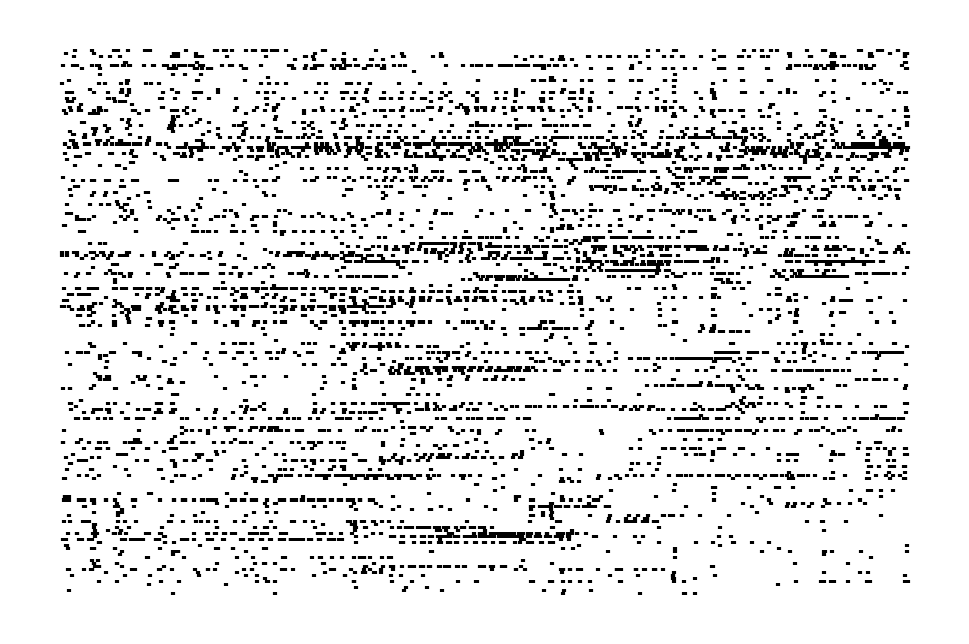

In [161]:
mouse_sess = 'npI1_0417'
files = glob.glob('giocomo_data/' + mouse_sess + '*.mat')
for fi in files[:1]:
    data = loadmat(fi)
    spikes = []
    ff = glob.glob('giocomo_analyses_250722/' + mouse_sess + '_data.npz')
    f = np.load(ff[0], allow_pickle = True)
    good_cells = f['good_cells']
    indsnull = f['indsnull']
    f.close()

f = np.load('giocomo_analyses_250722/' + '/' + mouse_sess + '_mods.npz',allow_pickle = True)
ind = f['ind']
f.close()

spikes = []
for cell_idx in range(len(good_cells)):           
    spk = data['sp']['st'][data['sp']['clu']==good_cells[cell_idx]]        
    if indsnull[cell_idx]:
        spikes.append(spk[(spk>20.54) & (spk<32.53)])
        spikes1 = []
for i in np.argsort(ind):
    spikes1.append(spikes[i])
fig, ax = plt.subplots(1,1,figsize = (6, 4), dpi = 200)
ax.eventplot(spikes1, color = 'k', linelengths =1, alpha = 1)#, color=colorCodes, linelengths = lineSize)  
ax.axis('off')


## Ratemaps and phases




npH3_0402 ind 1 53
False
0.7269921781936319 0.7331389211642775 0.627175310559686


<Figure size 432x288 with 0 Axes>

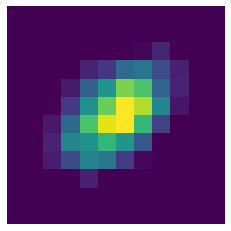

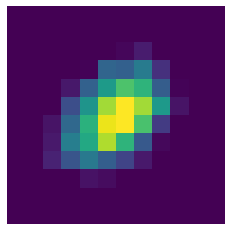

True
0.6883131011790815 0.6342191863699451 0.7480942000241646


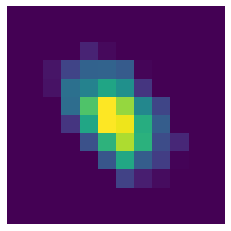

C:\Users\Finnern\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Finnern\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Finnern\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or n

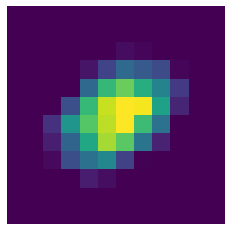



npI1_0417 ind 1 44
False
0.7799012829999377 0.8117181271494986 0.6875876202787322


<Figure size 432x288 with 0 Axes>

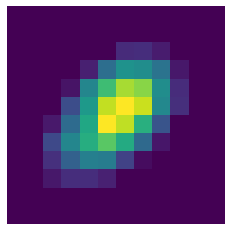

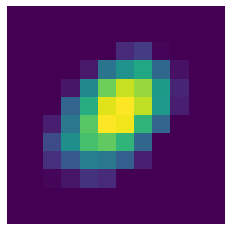

False
0.7673493486914423 0.8009384313585837 0.6756457523576054


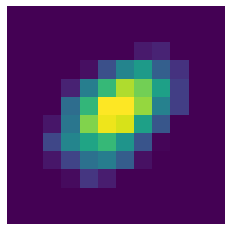

C:\Users\Finnern\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Finnern\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Finnern\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or n

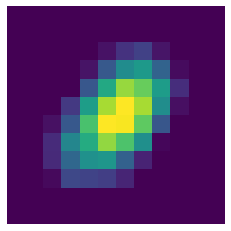

False
0.7060478477165764 0.7493587750138313 0.6014223579844369


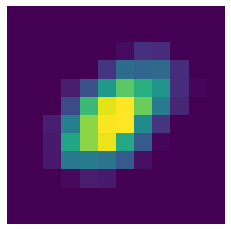

C:\Users\Finnern\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Finnern\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Finnern\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or n

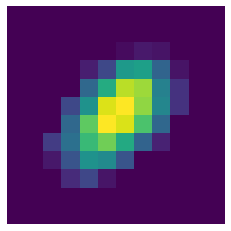



npI1_0417 ind 3 41
True
0.6833291979182649 0.5969060240938517 0.7087544072282984


<Figure size 432x288 with 0 Axes>

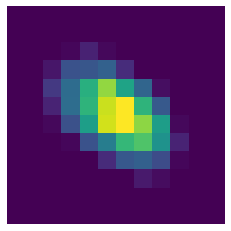

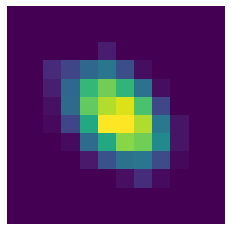

False
0.7319373185630462 0.7662394823820071 0.633028229792506


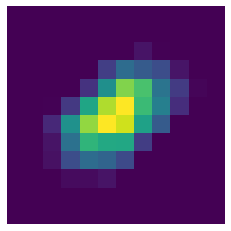

C:\Users\Finnern\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Finnern\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Finnern\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or n

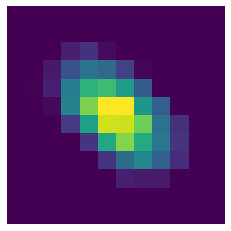

True
0.6821881515514665 0.6043267591074196 0.6828960181433281


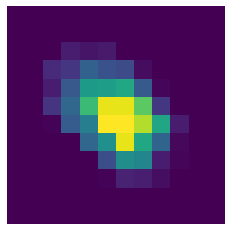

C:\Users\Finnern\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Finnern\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Finnern\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or n

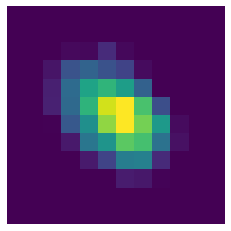



npI3_0420 ind 2 65
False
0.6914838224107165 0.7380591399674021 0.5803562808391802


<Figure size 432x288 with 0 Axes>

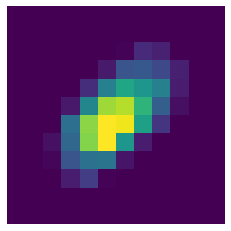

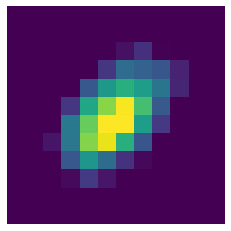

True
0.778293564736524 0.6779433930115515 0.7998273263604023


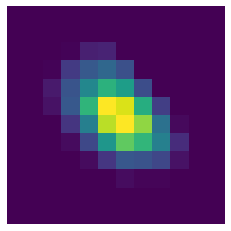

C:\Users\Finnern\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Finnern\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Finnern\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or n

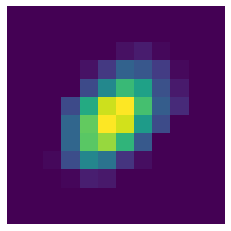



npI1_0418 ind 10 40
False
0.7624461506237032 0.802385934906302 0.6779513300297987


<Figure size 432x288 with 0 Axes>

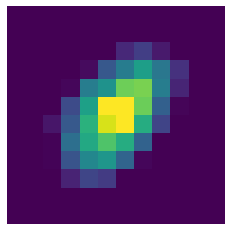

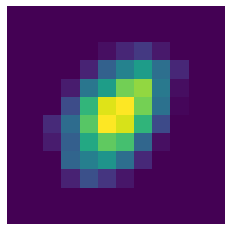

True
0.7451046321251167 0.6391090244888713 0.7605829923815743


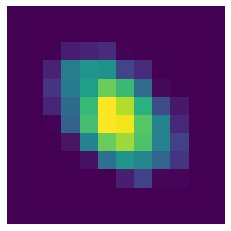

C:\Users\Finnern\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Finnern\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Finnern\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or n

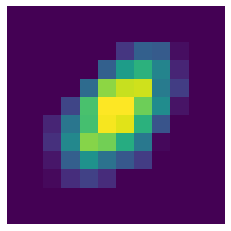

giocomo_data\npI1_0418_mismatch_notowers_2.mat not toroidal
giocomo_data\npI1_0418_playback_4.mat not toroidal


npJ5_0506 ind 21 43
True
0.7560102414016551 0.6597568661941993 0.7994327747120533


<Figure size 432x288 with 0 Axes>

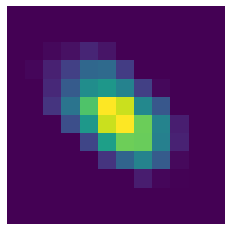

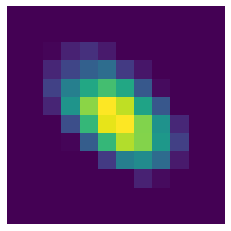

giocomo_data\npJ5_0506_gain_1.mat not toroidal
True
0.7463183996454688 0.6476714971391948 0.7822179219591541


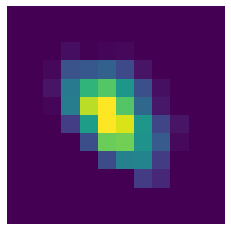

C:\Users\Finnern\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Finnern\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Finnern\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or n

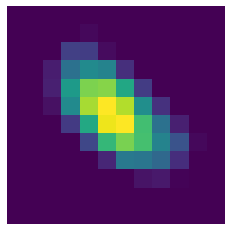



npI5_0415 ind 2 37
True
0.6531138113608879 0.573375940909632 0.68440879358314


<Figure size 432x288 with 0 Axes>

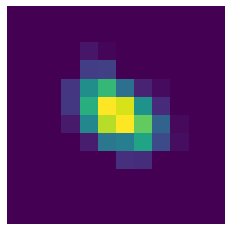

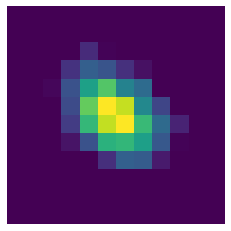

giocomo_data\npI5_0415_dark_1.mat not toroidal
giocomo_data\npI5_0415_gain_1.mat not toroidal


npJ4_0514 ind 2 25
giocomo_data\npJ4_0514_baseline_1.mat not toroidal
True
0.777778648593987 0.6805097275785452 0.8015060403766885


<Figure size 432x288 with 0 Axes>

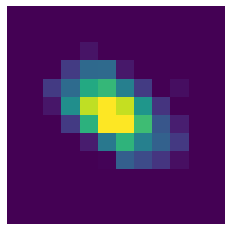

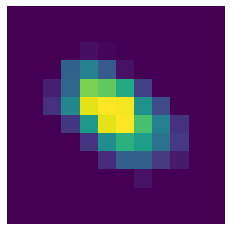

giocomo_data\npJ4_0514_gaincontrast2010_smallgainonly_1.mat not toroidal


In [19]:

figs_folder = 'giocomo_figures_250723'
data_dir = 'giocomo_analyses_250724'
try:
    os.mkdir(figs_folder)
except:
    print('')
    
mouse_all1 = glob.glob(data_dir + '/*.npz')
mouse_all = []
mouse_ss = {}
for mname in mouse_all1:
    mname = mname.replace(data_dir + '\\', '').replace('.npz','')
    if (mname[-9:].find('ind')>-1):
        mouse_all.extend([mname])
        if mname[:9] not in list(mouse_ss.keys()):
            mouse_ss[mname[:9]] = 1
        else:
            mouse_ss[mname[:9]] += 1
mouse_all = np.array(mouse_all)

toroidal = []
toroidal_files = []
numbins = 12
gains_means_all = {}
gains_std_all = {}
mouse_prev = ''



for i in ['npH3_0402_ind1', 'npI1_0417_ind1', 'npI1_0417_ind3', 'npI3_0420_ind2', 
          'npI1_0418_ind10', 'npJ5_0506_ind21', 'npI5_0415_ind2', 'npJ4_0514_ind2']:
    plt.viridis()
    folder_curr = figs_folder + '/' + i
    try:
        os.mkdir(folder_curr)
    except:
        print('')
    mouse_sess, cmod = i[:9], int(i[13:])
    files = glob.glob('giocomo_data/' + mouse_sess + '_*.mat')
    files.sort()

    (files, data_ensemble_all, speed1, spk1, good_cells, indsnull, speed, 
     data_pos, posx, post, posxx, postt, postrial, gain, 
     contrast, lickt, lickx, dgms_all, coords_ds_all, indstemp_all, times_cube_all, 
     coords1_all, e1) =  load_data_all(mouse_sess, cmod, data_dir, files)

    coords_aligned_all = {}
    fi_prev = 0
    bFiles = []
    for it, fi in enumerate(files):
        finame = fi.replace('giocomo_data\\', '').replace('.mat', '')
        (data_ensemble, dgms, coords_ds, indstemp, times_cube, coords1) = (data_ensemble_all[fi], dgms_all[it][0], 
                                                                                   coords_ds_all[it], indstemp_all[it], 
                                                                                   times_cube_all[fi], coords1_all[fi])


        if (((mouse_sess == 'npH3_0402') & ((fi.find('_dark_1')>-1) | (fi.find('_gaincontrast_1')>-1)))|
            ((mouse_sess == 'npI1_0417') & ((fi.find('_baseline_1')>-1) | (fi.find('_dark_1')>-1) | (fi.find('_gaincontrast10_1')>-1)))|
            ((mouse_sess == 'npI1_0418') & ((fi.find('_dark_1')>-1) | (fi.find('_gain_3')>-1)))|
            ((mouse_sess == 'npI3_0420') & ((fi.find('_dark_1')>-1) | (fi.find('_baseline_gain_1')>-1)))|
            ((mouse_sess == 'npI5_0415') & ((fi.find('_baseline_1')>-1)))|
            ((mouse_sess == 'npJ4_0514') & ((fi.find('_dark_1')>-1)))|
            ((mouse_sess == 'npJ5_0506') & ((fi.find('_dark_1')>-1) | (fi.find('_gain_2')>-1)))):
            psqr, phex, phex0, theta = get_sim_corr(coords_ds[:2,:].T*2*np.pi, data_ensemble[indstemp,:], 
                                        numbins = numbins, bSqr = True, folder = folder_curr, fname = finame)    

            mcstemp, mtot_all = get_ratemaps_center(coords_ds[:2,:].T*2*np.pi, data_ensemble[indstemp,:], numbins = numbins,)
            plot_centered_ratemaps(coords_ds[:2,:].T*2*np.pi, data_ensemble[indstemp,:], mcstemp, numbins)
            plt.show()

            toroidal.extend([i])
            bFiles.extend([fi])
            if fi_prev == 0:
                if (mouse_ss[mouse_sess] > 1) & (mouse_sess == mouse_prev):
                    coords_aligned = align_coords(coords1[:,:2], coords_prev[fi][:,:2], theta_i_prev, theta)
                    theta = theta_i_prev
                else:
                    coords_aligned = coords1.copy()
                    theta_i_prev = theta
                data_prev = data_ensemble.copy()
                theta_prev = theta
            else:
                coords_aligned = align_coords(coords1[:,:2], coords_aligned_all[files[0]][:,:2], 
                                              theta_prev, theta, times = [], times_cube = times_cube,
                                              indstemp = indstemp, data_ensemble1 = data_ensemble, 
                                              data_ensemble2 = data_ensemble_all[files[0]])
                
            mcstemp, mtot_all = get_ratemaps_center(coords_aligned[indstemp,:2], 
                                                    data_ensemble[indstemp,:], 
                                                    numbins = numbins,)
            plot_centered_ratemaps(coords_aligned[indstemp,:2], data_ensemble[indstemp,:], mcstemp, numbins)
            plt.show()
            fi_prev += 1
            coords_aligned_all[fi] = coords_aligned.copy()
        else:
#            coords_aligned_all[fi] = coords1.copy()
            print(fi + ' not toroidal')

    plot_phase_stats(mouse_sess, cmod, coords_aligned_all, speed, spk1, 
                     np.where(indsnull)[0][e1], folder_curr, numangsint = 16, 
                     files = list(coords_aligned_all.keys()))


## Plot correlation matrices 

In [153]:
data_dir = 'giocomo_analyses_250724'
figs_folder = 'giocomo_figures_250723'

for i in ['npI1_0417_ind1','npH3_0402_ind1', 
          'npI1_0417_ind3', 'npI3_0420_ind2',
          'npI1_0418_ind10', 'npJ5_0506_ind21', 
          'npI5_0415_ind2', 'npJ4_0514_ind2']:
    folder_curr = figs_folder + '/' + i
    lentmp = 30
    nbs = 0.6
    mouse_sess = i[:9]
    files = glob.glob('giocomo_data/' + mouse_sess + '*.mat')
    files.sort()
    ff = glob.glob('giocomo_analyses_250722' + '/' + mouse_sess + '_data.npz')

    f = np.load(ff[0], allow_pickle = True)
    good_cells = f['good_cells']
    indsnull = f['indsnull']
    f.close()

    ################### Get crosscorr stats ####################  
    crosscorr_train = get_cross(mouse_sess)
    num_neurons = len(good_cells)
    crosscorrs = np.zeros((num_neurons,num_neurons))
    cc_all = {}
    for fi in files: 
        fi1 = fi.replace('\\', '/')
        crosscorrs_tmp = crosscorr_train[fi1].copy()
        crosscorrs_tmp1 = np.zeros((num_neurons,num_neurons))

        num_neurons = len(crosscorrs_tmp[:,0,0])
        for i in range(num_neurons):
            for j in np.arange(i+1, num_neurons):
                a = crosscorrs_tmp[i,j,:lentmp]
                b = crosscorrs_tmp[j,i,:lentmp]
                c = np.concatenate((a,b))
                if np.min(c)>0:
                    crosscorrs[i,j] +=  np.square(np.min(c)/np.max(c))/len(files)
                    crosscorrs_tmp1[i,j] = np.max(c)/np.min(c)
                crosscorrs[j,i] = crosscorrs[i,j]
                crosscorrs_tmp1[j,i] = crosscorrs_tmp1[i,j]
                
        crosscorrs_tmp1 = crosscorrs_tmp1[indsnull,:]
        crosscorrs_tmp1 = crosscorrs_tmp1[:,indsnull]
        cc_all[fi] = crosscorrs_tmp1
        
    num_neurons = np.sum(indsnull)
    crosscorr_tmp = crosscorrs[indsnull,:]
    crosscorr_tmp = crosscorr_tmp[:,indsnull]
    X1  = crosscorr_tmp
    X1[np.isnan(X1)] = 1
    X1[np.isinf(X1)] = 1
    agg = AgglomerativeClustering(n_clusters=None,affinity='precomputed', linkage='average', 
                                  distance_threshold=nbs)
    ind = agg.fit(X1).labels_
    
    indssort = np.argsort(ind)
    num_neurons = len(indssort)
    num_dists = num_neurons*(num_neurons-1)/2 #+ num_neurons
    for fi in cc_all:
        finame = fi.replace('giocomo_data\\', '').replace('.mat', '')
        cc_tmp = cc_all[fi].copy()
        cc_tmp = cc_tmp[indssort,:]
        cc_tmp = cc_tmp[:,indssort]
        ccs = np.sort(cc_tmp[np.triu_indices(num_neurons,1)])
        first = ccs[round(num_dists*0.05)]
        ninenine = ccs[round(num_dists*0.95)]
        print(finame, first, ninenine)
        fig = plt.figure()
        plt.imshow(cc_tmp, vmin = first, vmax = ninenine, cmap = 'viridis')
        plt.axis('off')    
        fig.tight_layout()
        fig.savefig(folder_curr + '/cross_corr' + finame + '.png', transparent = True)
        fig.savefig(folder_curr + '/cross_corr' + finame + '.pdf', transparent = True)
        plt.close()
    



npI1_0417_baseline_1 1.0213401458908797 1.7695252534898729
npI1_0417_dark_1 1.0162604644503468 1.72433205615272
npI1_0417_gaincontrast10_1 1.0270353310974676 1.8324650082660296
npH3_0402_dark_1 1.0503388386726686 2.8553948105147384
npH3_0402_gaincontrast_1 1.0429583000442935 2.571436833312845
npI1_0417_baseline_1 1.0213401458908797 1.7695252534898729
npI1_0417_dark_1 1.0162604644503468 1.72433205615272
npI1_0417_gaincontrast10_1 1.0270353310974676 1.8324650082660296
npI3_0420_baseline_gain_1 1.0273173280054617 2.0217660454184236
npI3_0420_dark_1 1.0270110379919182 1.6693073893320103
npI1_0418_dark_1 1.0160093077053212 1.594368377175178
npI1_0418_gain_3 1.0243155219936613 1.6449215075828354
npI1_0418_mismatch_notowers_2 1.0179267727355445 1.6364850155291988
npI1_0418_playback_4 1.0247919947783715 1.8203575496268154
npJ5_0506_dark_1 1.0168606137497125 1.368265072469952
npJ5_0506_gain_1 1.0205961463424749 1.362153328969043
npJ5_0506_gain_2 1.0260667632925133 1.424432564682966
npI5_0415_ba

# Hexagonal vs Square torus




npI1_0417 ind 1 44
[0.91471813 0.8599049  0.        ] [0.00868794 0.01036609 0.        ]
[0.88352527 0.84616035 0.        ] [0.01268607 0.01337583 0.        ]
[0.91784009 0.89156967 0.        ] [0.00922479 0.01013837 0.        ]


<Figure size 432x288 with 0 Axes>

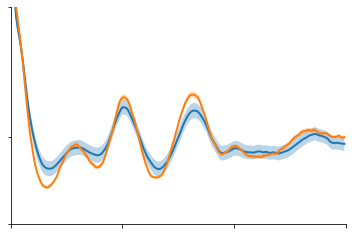

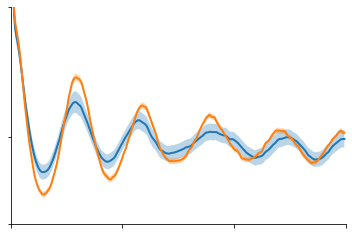

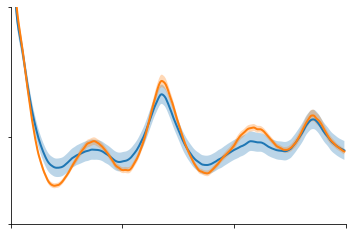

In [10]:
from utils_plot_giocomo import *
figs_folder = 'giocomo_figures_250723'
data_dir = 'giocomo_analyses_250724'
try:
    os.mkdir(figs_folder)
except:
    print('')
    
mouse_all1 = glob.glob(data_dir + '/*.npz')
mouse_all = []
mouse_ss = {}
for mname in mouse_all1:
    mname = mname.replace(data_dir + '\\', '').replace('.npz','')
    if (mname[-9:].find('ind')>-1):
        mouse_all.extend([mname])
        if mname[:9] not in list(mouse_ss.keys()):
            mouse_ss[mname[:9]] = 1
        else:
            mouse_ss[mname[:9]] += 1
mouse_all = np.array(mouse_all)

toroidal = []
toroidal_files = []
numbins = 12
gains_means_all = {}
gains_std_all = {}
mouse_prev = ''
sp = 10

acorr_real = {}
acorr_sim = {}
acorr_sim0 = {}
acorr_sim_sqr = {}
acorr_corr = {}
bSqr = False
#for i in ['npH3_0402_ind1','npI1_0417_ind3', 'npI3_0420_ind2',
#    'npI1_0418_ind10', 'npJ5_0506_ind21', 
#    'npI5_0415_ind2', 'npJ4_0514_ind2']:
for i in ['npI1_0417_ind1',]:
    plt.viridis()
    folder_curr = figs_folder + '/' + i
    try:
        os.mkdir(folder_curr)
    except:
        print('')
    mouse_sess, cmod = i[:9], int(i[13:])
    files = glob.glob('giocomo_data/' + mouse_sess + '_*.mat')
    files.sort()            
    (files, data_ensemble_all, speed1, spk1, good_cells, indsnull, speed, 
     data_pos, posx, post, posxx, postt, postrial, gain, 
     contrast, lickt, lickx, dgms_all, coords_ds_all, indstemp_all, times_cube_all, 
     coords1_all, e1) =  load_data_all(mouse_sess, cmod, data_dir, files)
    np.random.seed(0)

    coords = np.zeros((1,2))
    data_ensemble = np.zeros((1,len(data_ensemble_all[files[0]][0,:])))
    for fi in files:
        coords = np.concatenate((coords, coords1_all[fi][:,:2]),0)
        data_ensemble = np.concatenate((data_ensemble, data_ensemble_all[fi]),0)
    coords = coords[1:,:]             
    data_ensemble = data_ensemble[1:,:]

    cs = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
    spk_sim = {}
    spk_sim0 = {}
    spk_sim_sqr = {}
    t0 = 0
    for fi in files:
        times = np.arange(t0,t0+len(posxx[fi]))
        times = times[speed[fi]>sp]
        t0 +=len(posxx[fi])

        coords0 = coords[times,:].copy()
        mcstemp, mtot_all = get_ratemaps_center(coords0, data_ensemble[times,:], numbins = numbins)                
        spk_sim[fi] = get_sim(coords[times,:], mcstemp, numbins = numbins, simtype = 'hex') 
        #spk_sim_sqr[fi] = get_sim(coords[times,:], mcstemp, numbins = numbins, simtype = 'sqr') 

        coords0[:,0] = 2*np.pi-coords0[:,0]    
        mcstemp, mtot_all = get_ratemaps_center(coords0, data_ensemble[times,:], numbins = numbins)                
        spk_sim0[fi] = get_sim(coords[times,:], mcstemp, numbins = numbins, simtype = 'hex0') 

    t0 = 0
    for fi in files[:]:
        finame = fi.replace('giocomo_data\\', '').replace('.mat', '')

        fig, ax = plt.subplots(1,1)        
        acorr_mean_real = acorr_real[fi] - acorr_real[fi].mean(1)[:,np.newaxis]
        acorrmean = acorr_mean_real.mean(0)
        acorrstd = 1*acorr_real[fi].std(0)/np.sqrt(len(acorr_real[fi][:,0]))
        ax.plot(acorrmean, lw = 2, c= cs[0])
        ax.fill_between(np.arange(len(acorrmean)),acorrmean, acorrmean + acorrstd,
                        lw = 0, color= cs[0], alpha = 0.3)
        ax.fill_between(np.arange(len(acorrmean)),acorrmean, acorrmean - acorrstd,
                        lw = 0, color= cs[0], alpha = 0.3)        

        if np.median(acorr_corr[fi][:,1])>np.median(acorr_corr[fi][:,0]):
            acorr_mean_sim0 = acorr_sim0[fi] - acorr_sim0[fi].mean(1)[:,np.newaxis]
            acorrmean = acorr_mean_sim0.mean(0)
            acorrstd = 1*acorr_sim0[fi].std(0)/np.sqrt(len(acorr_real[fi][:,0]))
            ax.plot(acorrmean, lw = 2, c= cs[1])
            ax.fill_between(np.arange(len(acorrmean)),acorrmean, acorrmean + acorrstd,
                            lw = 0, color= cs[1], alpha = 0.3)
            ax.fill_between(np.arange(len(acorrmean)),acorrmean, acorrmean - acorrstd,
                            lw = 0, color= cs[1], alpha = 0.3)        

        else:
            acorr_mean_sim = acorr_sim[fi] - acorr_sim[fi].mean(1)[:,np.newaxis]
            acorrmean = acorr_mean_sim.mean(0)
            acorrstd = 1*acorr_sim[fi].std(0)/np.sqrt(len(acorr_real[fi][:,0]))
            ax.plot(acorrmean, lw = 2, c= cs[1])
            ax.fill_between(np.arange(len(acorrmean)),acorrmean, acorrmean + acorrstd,
                            lw = 0, color= cs[1], alpha = 0.3)
            ax.fill_between(np.arange(len(acorrmean)),acorrmean, acorrmean - acorrstd,
                            lw = 0, color= cs[1], alpha = 0.3)        

        if bSqr:
            acorr_sim_sqr[fi] = get_acorrs(spk_sim_sqr[fi], postrial[fi][speed[fi]>sp], posxx[fi][speed[fi]>sp])        
            acorr_mean_sqr = acorr_sim_sqr[fi] - acorr_sim_sqr[fi].mean(1)[:,np.newaxis]
            acorrmean = acorr_mean_sqr.mean(0)
            acorrstd = 1*acorr_sim_sqr[fi].std(0)/np.sqrt(len(acorr_real[fi][:,0]))
            ax.plot(acorrmean, lw = 2, c= cs[3])
            ax.fill_between(np.arange(len(acorrmean)),acorrmean, acorrmean + acorrstd,
                            lw = 0, color= cs[3], alpha = 0.3)
            ax.fill_between(np.arange(len(acorrmean)),acorrmean, acorrmean - acorrstd,
                            lw = 0, color= cs[3], alpha = 0.3)        
            ax.set_aspect(1/ax.get_data_ratio())
        
        plt.gca().axes.spines['top'].set_visible(False)
        plt.gca().axes.spines['right'].set_visible(False)
        plt.xlim([0, 300])
        plt.ylim([-0.15, 0.4])


        xs = [0,100,200,300]
        ax.set_xticks(xs)
        ax.set_xticklabels(np.zeros(len(xs),dtype=str))
        ys = [-0.15, 0.0, 0.15, 0.3]
        ax.set_yticks(ys)
        ax.set_yticklabels(np.zeros(len(ys),dtype=str))
        plt.savefig(folder_curr + '/spatial_acorrs_' + finame, bbox_inches='tight', pad_inches=0.1, transparent = True)




In [49]:
## Get correlation of simulated hexagonal and real acorr
p_shuffled = np.zeros((len(files), 100, len(data_ensemble[0,:])))
for it, fi in enumerate(files):
    data_ensemble = data_ensemble_all[fi].copy()
    coords_ds = coords_ds_all[it].copy()
    indstemp = indstemp_all[it].copy()

    for shuff in range(100):
        data_shuff = data_ensemble[indstemp,:].copy()
        for n in range(len(data_shuff[0,:])):
            data_shuff[:,n] = np.roll(data_shuff[:,n], int(np.random.rand()*len(indstemp)))
        p_shuffled[it,shuff,:] = get_sim_hex_corr(coords_ds[:2,:].T*2*np.pi, data_shuff, numbins = numbins)    
        
for it in range(3):
    meds = np.median(p_shuffled[it,:,:], 1)
    print(files[it], max(meds), min(meds))

0.05077842243678318 0.041047518243123735
0.01943785311656597 0.019626380075069172
0.056381613110158435 0.04342828812651064
0.04506257398649724 0.04463718341012226
0.04947953922337131 0.0325668766249126
0.0378527431735545 0.036478600164316935
0.05839065518568138 0.04781869525691644
0.023848861157081885 0.0272729057214837
0.0680066428943572 0.05471693775662342
0.0251843992350975 0.033216167920967904
0.04099754386625286 0.020692897156548873
0.06260371363983794 0.04984281666524372
0.04092125972835731 0.02578817676139758
0.0438238610395946 0.026577712540788077
0.04997475460417629 0.06246365262950229
0.035098879031984755 0.01804751618110368
0.054363648242987866 0.042010125722910435
0.04165688851434336 0.03349681709167005
0.05539506891596577 0.04776678482715048
0.05713450450183931 0.04650091689252671
0.035578050273863626 0.04172323686730859
0.05816672479813785 0.050742031204951035
0.04968931470620233 0.052669494326458954
0.06351056343630695 0.07620510102084814
0.03872907345041144 0.0249206850

## Gain Estimation

In [ ]:

gains_means_all = {}
gains_std_all = {}
gains_all = {}
cc_gains_total = {}
for i in ['npH3_0402_ind1',
          'npI1_0417_ind1', 
          'npI1_0417_ind3',
          'npI1_0418_ind10',
          'npI3_0420_ind2',
          'npJ5_0506_ind21'
         ]:
    mouse_sess, cmod = i[:9], int(i[13:])
    files = glob.glob('giocomo_data/' + mouse_sess + '*mat')

    for (num_reg, lin_thr, sig) in (#(500,0.5,0),
                                   #(100,0.6,0),
                                   #(100,0.0,0),
                                    (100,0.5,0),):
                                   #(500,0.7,0),):
                                   #(100,0.8,0)):
        cs =   {}
        t0 = 0
        gains_means = {}
        gains_stds = {}
        gains_curr = {}
        for fi in files:
            if fi.find('gain')>-1:
                if (mouse_sess == 'npJ5_0506') & (fi.find('gain_1')>-1):
                    continue
                cctrial = cctrial_fi_all[fi + str(cmod)].copy()
                postrial = postrial_fi_all[fi].copy()
                contrast = contrast_fi_all[fi].copy()
                gain = gain_fi_all[fi].copy()            
                for contrast_temp in np.unique(contrast[fi]):
                    traj_keep = (contrast[fi] == contrast_temp)        
                    trial_range = np.unique(postrial[fi])[traj_keep]
                    gain_trials = gain[traj_keep]  
                    if len(np.unique(gain_trials))>1:
                        fig1 = plt.figure()
                        ax1 = fig1.add_subplot(111)
                        gains = np.unique(gain_trials)
                        trials_all = postrial[fi].copy()
                        gg = []
                        cc_gains_all = []
                        for i, g1 in enumerate(gains):
                            trial_curr = trial_range[gain_trials==g1]
                            cc_gains = []
                            for j, cctrial1 in enumerate(trial_curr):       
                                cccurr = cctrial[trials_all == cctrial1]
                                cccurr = cccurr[np.linspace(0,len(cccurr)-1, num_reg).astype(int)]
                                lin1 = linregress(np.arange(len(cccurr)),cccurr[:,0])
                                lin2 = linregress(np.arange(len(cccurr)),cccurr[:,1])
                                cccurr = np.concatenate(((lin1[0]*np.arange(len(cccurr))+lin1[2])[:,np.newaxis],
                                                        (lin2[0]*np.arange(len(cccurr))+lin2[2])[:,np.newaxis]),1)
                                if lin_thr>0:
                                    if (np.abs(lin1[2])>lin_thr) & (np.abs(lin2[2])>lin_thr):
                                        maxx,maxy = cccurr[-1,:]
                                        minx,miny = cccurr[0,:]
                                        cc_gains.extend([np.sqrt(np.sum(np.square([maxx-minx, maxy-miny])))])
                                else:
                                    maxx,maxy = cccurr[-1,:]
                                    minx,miny = cccurr[0,:]
                                    cc_gains.extend([np.sqrt(np.sum(np.square([maxx-minx, maxy-miny])))])

                            if len(cc_gains) >2:
                                cc_gains_all.append(cc_gains)
                                gg.extend([g1])
                        gains_mean = np.zeros(len(gg))
                        gains_std = np.zeros((len(gg), 2))
                        cc_gains_total[fi + str(cmod) + '_c' + str(contrast_temp)] = cc_gains_all.copy()
                        for i in range(len(gg)):
                            cc_gains_all[i] /= np.median(cc_gains_all[-1])
                            gains_mean[i] = np.median(cc_gains_all[i]) 
                            #gains_std[i] = [gains_mean[i]-np.std(cc_gains_all[i]), 
                            #                gains_mean[i]+np.std(cc_gains_all[i])]
                            gains_std[i] =[np.quantile(cc_gains_all[i], 0.25), np.quantile(cc_gains_all[i], 0.75)]

                        gains_means[fi + str(contrast_temp)] = gains_mean.copy()
                        gains_stds[fi + str(contrast_temp)] = gains_std.copy()
                        gains_curr[fi + str(contrast_temp)] = np.array(gg).copy()

                        ax1.scatter(gg, gains_mean, marker = 'o', s = 50, lw = 0.1, c= 'k')
                        ax1.plot(gg, gains_mean, ls = ':', lw = 1.5, c= 'k')
                        for i in range(len(gg)):
                            ax1.plot([gg[i],gg[i]], [gains_std[i][0], gains_std[i][1]], 
                                     lw = 0.75,c = 'k')
                        ax1.set_xticks(gg)  
                        ax1.set_ylim([0.5,2.4])
                        ax1.set_xlim([0.45,1.05])
                        ax1.plot(plt.gca().get_xlim(), np.ones(2), c = 'k', ls = '--')
                        fig1.tight_layout()
                        finame = fi.replace('giocomo_data\\', '').replace('.mat', '')
                        print(gains_mean)
                        plt.show()         

        gains_means_all[mouse_sess + '_ind' + str(cmod)] = gains_means.copy()
        gains_std_all[mouse_sess + '_ind' + str(cmod)] = gains_stds.copy()
        gains_all[mouse_sess + '_ind' + str(cmod)] = gains_curr.copy()
        

        for cgt in cc_gains_total:
            for i in range(len(cc_gains_total[cgt])-1):
                print(cgt, len(cc_gains_total[cgt][i]))
                print(kruskal(cc_gains_total[cgt][i], cc_gains_total[cgt][-1]))
            print('')
            print('')
            
            
            
colors_mods = {}
colors_mods['npH3_0402_ind1'] = [[0.7,0.3,0.3]]
colors_mods['npI1_0417_ind1'] = [[0.3,0.7,0.3]]
colors_mods['npI1_0417_ind3'] = [[0.3,0.3,0.7]]
colors_mods['npI1_0418_ind10'] = [[0.7,0.7,0]]
colors_mods['npI3_0420_ind2'] = [[0.7,0.,0.7]]
colors_mods['npJ5_0506_ind21'] = [[0.,0.7,0.7]]


fig, ax1 = plt.subplots(1,1, figsize = (5,5),dpi = 120)
mouse_prev = ''
it = 0
for i in np.flip(list(gains_means_all.keys())):
    mouse_sess, cmod = i[:9], i[13:]
    for fi in gains_means_all[i]:
        contrast_temp = fi[fi.find('.mat')+4:]
        it += 1
#        c1 = cc_gains_total[fi + cmod + '_c' + contrast_temp].copy()     
        g1 = gains_all[i][fi].copy()
        g2 = gains_means_all[i][fi].copy()
        g3 = gains_std_all[i][fi].copy()
        print(g1,g2,g3)
        ax1.scatter(g1, g2, marker = 'o', s = 50, lw = 0, c= colors_mods[mouse_sess + '_ind' + cmod])
        ax1.plot(g1, g2, ls = ':', lw = 2, c= colors_mods[mouse_sess + '_ind' + cmod][0])
        for ii in range(len(g1)):
            ax1.plot([g1[ii],g1[ii]], 
                     [g3[ii][0], g3[ii][1]], 
                     lw = 1.5,c = colors_mods[mouse_sess + '_ind' + cmod][0])
            
ax1.plot(plt.gca().get_xlim(), np.ones(2), c = [0.,0.,0.], ls = '--', alpha = 0.7, lw = 5, zorder =-2)
ax1.plot([0.5,1], [2, 1], c = [0.5,0.5,0.5], ls = '--', alpha = 0.7, lw = 5, zorder =-2)

ax1.set_ylim([0.7,2.4])
ax1.set_xlim([0.4,1.1])

xs = gains
ax1.set_xticks(xs)
ax1.set_xticklabels(np.zeros(len(xs),dtype=str))

ys = [1,1.5,2]
#ys = xs
ax1.set_yticks(ys)
ax1.set_yticklabels(np.zeros(len(ys),dtype=str))
#ax1.set_aspect('equal', 'box')

fig1.tight_layout()
plt.savefig(figs_folder + '/gains_all.png', pad_inches = 0.1, transparent = True)
plt.savefig(figs_folder + '/gains_all.pdf', pad_inches = 0.1, transparent = True)

In [ ]:
from scipy.stats import kruskal
for fi in cc_gains_total:
    if fi.find('npJ5_0506_gain_1')>-1:
        continue
    print (fi,  len(cc_gains_total[fi][-1]))
    for i in range(len(cc_gains_total[fi])-1):
#        if len(cc_gains_total[fi][i])>2:
        print(len(cc_gains_total[fi][i]))
        print(i, kruskal(cc_gains_total[fi][i], cc_gains_total[fi][-1]))
    print('')
    print('')

In [ ]:
fig, ax1 = plt.subplots(1,1, figsize = (5,5),dpi = 120)
mouse_prev = ''
it = 0
for i in np.flip(list(gains_means_all.keys())):
    mouse_sess, cmod = i[:9], i[13:]
    for fi in gains_means_all[i]:
        contrast_temp = fi[fi.find('.mat')+4:]
        it += 1
#        c1 = cc_gains_total[fi + cmod + '_c' + contrast_temp].copy()     
        g1 = gains_all[i][fi].copy()
        g2 = gains_means_all[i][fi].copy()
        g3 = gains_std_all[i][fi].copy()
        print(g1,g2,g3)
        ax1.scatter(g1, g2, marker = 'o', s = 50, lw = 0, c= colors_mods[mouse_sess + '_ind' + cmod])
        ax1.plot(g1, g2, ls = ':', lw = 2, c= colors_mods[mouse_sess + '_ind' + cmod][0])
        for ii in range(len(g1)):
            ax1.plot([g1[ii],g1[ii]], 
                     [g3[ii][0], g3[ii][1]], 
                     lw = 1.5,c = colors_mods[mouse_sess + '_ind' + cmod][0])
            
ax1.set_ylim([0.7,2.6])
ax1.set_xlim([0.45,1.05])
ax1.plot(plt.gca().get_xlim(), np.ones(2), c = [0.,0.,0.], ls = '--', alpha = 0.7, lw = 3, zorder =-2)
ax1.plot([0.45,1.05], [2.1, 0.9], c = [0.5,0.5,0.5], ls = '--', alpha = 0.7, lw = 3, zorder =-2)


xs = gains
xs = [0.5,0.75,1]
ax1.set_xticks(xs)
ax1.set_xticklabels(np.zeros(len(xs),dtype=str))

ys = [1,1.5,2, 2.5]
#ys = xs
ax1.set_yticks(ys)
ax1.set_yticklabels(np.zeros(len(ys),dtype=str))
#ax1.set_aspect('equal', 'box')

fig1.tight_layout()
plt.savefig(figs_folder + '/gains_all.png', pad_inches = 0.1, transparent = True)
plt.savefig(figs_folder + '/gains_all.pdf', pad_inches = 0.1, transparent = True)

## Plot trial trajectories

#### Torus 3d 

In [ ]:
#from utils_plot_giocomo import *
ks = np.array([[0,0], [1,0], [0,1], [1,1], [-1,0], [0,-1], [-1,-1], [1,-1], [-1,1]])

figs_folder = 'giocomo_figures_250723'
data_dir = 'giocomo_analyses_250724'
try:
    os.mkdir(figs_folder)
except:
    print('')
    
mouse_all1 = glob.glob(data_dir + '/*.npz')
mouse_all = []
mouse_ss = {}
for mname in mouse_all1:
    mname = mname.replace(data_dir + '\\', '').replace('.npz','')
    if (mname[-9:].find('ind')>-1):
        mouse_all.extend([mname])
        if mname[:9] not in list(mouse_ss.keys()):
            mouse_ss[mname[:9]] = 1
        else:
            mouse_ss[mname[:9]] += 1
mouse_all = np.array(mouse_all)

toroidal = []
toroidal_files = []
numbins = 12
gains_means_all = {}
gains_std_all = {}
mouse_prev = ''
for i in ['npI1_0417_ind1',]:#'npI1_0417_ind3']:#'npH3_0402_ind1','npI1_0417_ind1', 'npI1_0417_ind3', 'npI3_0420_ind2', 'npI1_0418_ind10', 'npJ5_0506_ind21', 
    #'npI5_0415_ind2', 'npJ4_0514_ind2']:
    plt.viridis()
    folder_curr = 'torus_plots' + '/' + i
    try:
        os.mkdir(folder_curr)
    except:
        print('')
    mouse_sess, cmod = i[:9], int(i[13:])
    files = glob.glob('giocomo_data/' + mouse_sess + '_*.mat')
    files.sort()
                
    (files, data_ensemble_all, speed1, spk1, good_cells, indsnull, speed, 
     data_pos, posx, post, posxx, postt, postrial, gain, 
     contrast, lickt, lickx, dgms_all, coords_ds_all, indstemp_all, times_cube_all, 
     coords1_all, e1) =  load_data_all(mouse_sess, cmod, data_dir, files)            

    cs1 = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

    for it, fi in enumerate(files[:2]):
        finame = fi.replace('giocomo_data\\', '').replace('.mat', '')
        (data_ensemble, dgms, coords_ds, indstemp, times_cube, coords1) = (data_ensemble_all[fi], dgms_all[it][0], 
                                                                                   coords_ds_all[it], indstemp_all[it], 
                                                                                   times_cube_all[fi], coords1_all[fi])




        coordscurr = coords1.copy()
        cc = np.arctan2(gaussian_filter1d(np.sin(coordscurr),sigma = 50,axis = 0),
                        gaussian_filter1d(np.cos(coordscurr),sigma = 50,axis = 0))%(2*np.pi)

                
        psqr, phex, phex0, theta = get_sim_corr(coords_ds[:2,:].T*2*np.pi, data_ensemble[indstemp,:], 
                                        numbins = numbins, bSqr = True, folder = folder_curr, fname = finame)    
        if not theta:
            cc[:,0] = 2*np.pi - cc[:,0]
        dcoords = np.diff(cc, axis = 0)
        if np.sum(dcoords<0)>np.sum(dcoords>0):
            cc = 2*np.pi-cc

        times1 = np.arange(len(postrial[fi]))
        cctrial_temp = cc[:,:2]#[valid_trialsSpike, :2]
        cctrial = np.zeros_like(cctrial_temp)
        cctrial[0,:] = cctrial_temp[0,:].copy()            
        k1, k2 = 0, 0
        for cn  in range(len(cctrial_temp)-1):
            c1 = cctrial_temp[cn+1]
            c_temp = [c1 + (k1*2*np.pi, k2*2*np.pi), 
                      c1 + ((k1+1)*2*np.pi, k2*2*np.pi), 
                      c1 + (k1*2*np.pi, (k2+1)*2*np.pi), 
                      c1 + ((k1+1)*2*np.pi, (k2+1)*2*np.pi), 
                      c1 + ((k1-1)*2*np.pi, k2*2*np.pi), 
                      c1 + (k1*2*np.pi, (k2-1)*2*np.pi), 
                      c1 + ((k1-1)*2*np.pi, (k2-1)*2*np.pi), 
                      c1 + ((k1+1)*2*np.pi, (k2-1)*2*np.pi), 
                      c1 + ((k1-1)*2*np.pi, (k2+1)*2*np.pi), 
                     ]  
            cmin = np.argmin(np.sum(np.square(c_temp-cctrial[cn]),1))
            cctrial[cn+1,:] = c_temp[cmin]
            k1 += ks[cmin][0]
            k2 += ks[cmin][1]                
#            num_rhomb = int(np.max(cctrial)/(2*np.pi))+1
        num_rhomb = 3
        cctrial1 = cctrial.copy()
        cctrial1[:,0] -= 0.5*cctrial1[:,1]
        
        r1 = 1.5
        r2 = 1.0
        x = (r1 + r2*np.cos(cctrial1[:,0]))*np.cos(cctrial1[:,1]) 
        y = (r1 + r2*np.cos(cctrial1[:,0]))*np.sin(cctrial1[:,1])  
        z =  r2*np.sin(cctrial1[:,0])
#        z = 1-z-1
        
        for pathind in np.unique(postrial[fi]):
        #for pathind in np.array(np.random.rand(5)*len(np.unique(postrial[fi])),dtype = int):
            
            valid_trialsSpike = np.in1d(postrial[fi],np.array([pathind]))
            trial_len = sum(valid_trialsSpike)

            fig = plt.figure(figsize=(10,5), dpi = 120)
            ax = fig.add_subplot(111, projection='3d')
            ax.scatter(x,
                       y,
                       z, edgecolors = None,
                       c = x,
                       cmap = 'Blues', 
                       alpha = 0.5,s = 0.005, zorder = -2)
            ax.scatter(x[valid_trialsSpike],
                       y[valid_trialsSpike],
                       z[valid_trialsSpike], c = np.arange(trial_len), cmap = 'inferno',
                       alpha = 1,s = 20, zorder = -1)
            ax.axis('off')
            ax.view_init(66,180)                
            fig.tight_layout()
            plt.show()
            plt.savefig(folder_curr + '/' + finame + ' ' + str(pathind) + '_torus3d', pad_inches = 0.1, transparent = True)
            plt.close()
            


#### Torus 2d 

In [ ]:
from utils_plot_giocomo import *
ks = np.array([[0,0], [1,0], [0,1], [1,1], [-1,0], [0,-1], [-1,-1], [1,-1], [-1,1]])

figs_folder = 'giocomo_figures_250723'
data_dir = 'giocomo_analyses_250724'
try:
    os.mkdir(figs_folder)
except:
    print('')
    
mouse_all1 = glob.glob(data_dir + '/*.npz')
mouse_all = []
mouse_ss = {}
for mname in mouse_all1:
    mname = mname.replace(data_dir + '\\', '').replace('.npz','')
    if (mname[-9:].find('ind')>-1):
        mouse_all.extend([mname])
        if mname[:9] not in list(mouse_ss.keys()):
            mouse_ss[mname[:9]] = 1
        else:
            mouse_ss[mname[:9]] += 1
mouse_all = np.array(mouse_all)

toroidal = []
toroidal_files = []
numbins = 12
gains_means_all = {}
gains_std_all = {}
mouse_prev = ''
for i in ['npI1_0417_ind1',]:#'npH3_0402_ind1','npI1_0417_ind1', 'npI1_0417_ind3', 'npI3_0420_ind2', 'npI1_0418_ind10', 'npJ5_0506_ind21', 
    #'npI5_0415_ind2', 'npJ4_0514_ind2']:
    plt.viridis()
    folder_curr = 'torus_plots' + '/' + i
    try:
        os.mkdir(folder_curr)
    except:
        print('')
    mouse_sess, cmod = i[:9], int(i[13:])
    files = glob.glob('giocomo_data/' + mouse_sess + '_*.mat')
    files.sort()
                
    (files, data_ensemble_all, speed1, spk1, good_cells, indsnull, speed, 
     data_pos, posx, post, posxx, postt, postrial, gain, 
     contrast, lickt, lickx, dgms_all, coords_ds_all, indstemp_all, times_cube_all, 
     coords1_all, e1) =  load_data_all(mouse_sess, cmod, data_dir, files)            

    cs1 = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

    for it, fi in enumerate(files[:2]):
        finame = fi.replace('giocomo_data\\', '').replace('.mat', '')
        (data_ensemble, dgms, coords_ds, indstemp, times_cube, coords1) = (data_ensemble_all[fi], dgms_all[it][0], 
                                                                                   coords_ds_all[it], indstemp_all[it], 
                                                                                   times_cube_all[fi], coords1_all[fi])




        coordscurr = coords1.copy()
        cc = np.arctan2(gaussian_filter1d(np.sin(coordscurr),sigma = 50,axis = 0),
                        gaussian_filter1d(np.cos(coordscurr),sigma = 50,axis = 0))%(2*np.pi)

                
        psqr, phex, phex0, theta = get_sim_corr(coords_ds[:2,:].T*2*np.pi, data_ensemble[indstemp,:], 
                                        numbins = numbins, bSqr = True, folder = folder_curr, fname = finame)    
        if not theta:
            cc[:,0] = 2*np.pi - cc[:,0]
        dcoords = np.diff(cc, axis = 0)
        if np.sum(dcoords<0)>np.sum(dcoords>0):
            cc = 2*np.pi-cc

        times1 = np.arange(len(postrial[fi]))
        cctrial_temp = cc[:,:2]#[valid_trialsSpike, :2]
        cctrial = np.zeros_like(cctrial_temp)
        cctrial[0,:] = cctrial_temp[0,:].copy()            
        k1, k2 = 0, 0
        for cn  in range(len(cctrial_temp)-1):
            c1 = cctrial_temp[cn+1]
            c_temp = [c1 + (k1*2*np.pi, k2*2*np.pi), 
                      c1 + ((k1+1)*2*np.pi, k2*2*np.pi), 
                      c1 + (k1*2*np.pi, (k2+1)*2*np.pi), 
                      c1 + ((k1+1)*2*np.pi, (k2+1)*2*np.pi), 
                      c1 + ((k1-1)*2*np.pi, k2*2*np.pi), 
                      c1 + (k1*2*np.pi, (k2-1)*2*np.pi), 
                      c1 + ((k1-1)*2*np.pi, (k2-1)*2*np.pi), 
                      c1 + ((k1+1)*2*np.pi, (k2-1)*2*np.pi), 
                      c1 + ((k1-1)*2*np.pi, (k2+1)*2*np.pi), 
                     ]  
            cmin = np.argmin(np.sum(np.square(c_temp-cctrial[cn]),1))
            cctrial[cn+1,:] = c_temp[cmin]
            k1 += ks[cmin][0]
            k2 += ks[cmin][1]                
#            num_rhomb = int(np.max(cctrial)/(2*np.pi))+1
        num_rhomb = 3
        cctrial1 = cctrial.copy()
        cctrial1[:,0] -= 0.5*cctrial1[:,1]
                
        for pathind in np.unique(postrial[fi]):
        #for pathind in np.array(np.random.rand(5)*len(np.unique(postrial[fi])),dtype = int):
            
            valid_trialsSpike = np.in1d(postrial[fi],np.array([pathind]))
            trial_len = sum(valid_trialsSpike)
            
            cccurr = cctrial1[valid_trialsSpike,:]
            ccorig = cccurr[0,:]%(2*np.pi)
            cccurr -= (cccurr[0,:]-ccorig)
            fig, ax = plt.subplots(1,1, figsize = (10,5), dpi = 120)
            ax.scatter(cccurr[:,0], cccurr[:,1], 
                       s = 1, alpha = 0.7, c = np.arange(trial_len)/trial_len, cmap = 'hot', 
                       vmin = 0, vmax = 1, zorder = -3)
            
            posx_trial = posxx[fi][valid_trialsSpike]
            lm_inds = np.concatenate(([np.argmin(np.abs(posx_trial-0))],
                                      [np.argmin(np.abs(posx_trial-80))],
                                      [np.argmin(np.abs(posx_trial-160))],
                                      [np.argmin(np.abs(posx_trial-240))],
                                      [np.argmin(np.abs(posx_trial-320))],
                                      [np.argmin(np.abs(posx_trial-400))],))                           

            ax.scatter(cccurr[lm_inds,0], cccurr[lm_inds,1], 
                       marker = 'X', lw = 0.25, s = 30, c = 'gray',#c =cs1[:len(lm_inds)],
                       zorder = -1)
            for i in range(num_rhomb):
                for j in range(num_rhomb):
                    ax.plot([2*np.pi*i,2*np.pi*(i+1)],[2*np.pi*j,2*np.pi*j], c = 'k', ls = '--', lw = 1, zorder = -2)
                    ax.plot([2*np.pi*i,2*np.pi*i],[2*np.pi*j,2*np.pi*(j+1)], c = 'k', ls = '--', lw = 1, zorder = -2)
            i += 1
            for j in range(i):
                ax.plot([2*np.pi*i,2*np.pi*i],[2*np.pi*j,2*np.pi*(j+1)], c = 'k', ls = '--', lw = 1, zorder = -2)
            j += 1
            for i in range(j):
                ax.plot([2*np.pi*i,2*np.pi*(i+1)],[2*np.pi*j,2*np.pi*j], c = 'k', ls = '--', lw = 1, zorder = -2)

            ax.set_aspect('equal', 'box') 
            ax.axis('off')
            fig.tight_layout()
                                    
            r_box = transforms.Affine2D().skew_deg(15,15)
            for xtemp in  ax.lines + ax.collections:
                trans = xtemp.get_transform()
                xtemp.set_transform(r_box+trans) 
                if isinstance(xtemp, PathCollection):
                    transoff = xtemp.get_offset_transform()
                    xtemp._transOffset = r_box+transoff     
            ax.set_xlim(-np.pi, (num_rhomb)*2*np.pi + 8*3*np.pi/5)
            ax.set_ylim(-np.pi, (num_rhomb)*2*np.pi + 8*3*np.pi/5)
            plt.show()
            plt.savefig(folder_curr + '/' + finame + ' ' + str(pathind) + '_torus2d', pad_inches = 0.1, transparent = True)
            plt.close()

## Analyze GLM

In [ ]:
data_dir = 'giocomo_analyses_250724'
data_dir1 = 'giocomo_analyses_250722'
mouse_sess = sys.argv[1]
files = glob.glob('giocomo_data/' + mouse_sess + '_*.mat')
files.sort()
print(files)
numbins_tor = [4,]
numbins_space = [16,]
LAMs = [1,]
indfile = glob.glob(data_dir1 + '/' + mouse_sess + '_mods.npz')
print(data_dir1 + '/' + mouse_sess + '_mods.npz')
f = np.load(indfile[0], allow_pickle = True)
ind = f['ind'][()]
f.close()

mouse_curr = ('npH3_0402_ind1', 'npI1_0417_ind1', 'npI1_0417_ind3', 'npI1_0418_ind10',
 'npI3_0420_ind2', 'npI5_0413_ind5', 'npI5_0415_ind2', 'npJ2_0511_ind0',
  'npJ4_0511_ind0', 'npJ4_0514_ind2', 'npJ5_0506_ind14',
 'npJ5_0506_ind21', 'npJ5_0508_ind1')

for cmod in np.unique(ind):
    if mouse_sess + '_ind' + str(cmod) in mouse_curr:
        if len(files)>1:
            for fi in files:
                if fi.find('dark')>-1:
                    break
            tor3 = run_GLM(mouse_sess, cmod, data_dir, numbins_tor, LAMs, 
              cv_folds = 3, bTor = True, bSess = True, files = files, 
              files_dec = [fi,], gain_score = 1, contrast_score = 100)

            space3 = run_GLM(mouse_sess, cmod, data_dir, numbins_space, LAMs, 
              cv_folds = 3, bTor = False, bSess = False, files = files, 
              gain_score = 1, contrast_score = 100)

            np.savez(data_dir + '/' + mouse_sess + '_ind' + str(cmod) + '_glm_baseline', 
                space3 = space3,
                tor3 = tor3)


In [ ]:
from utils_plot_giocomo import *
figs_folder = 'giocomo_figures_250723'
data_dir = 'giocomo_analyses_250722'
try:
    os.mkdir(figs_folder)
except:
    print('')
    
mouse_all1 = glob.glob(data_dir + '/*.npz')
mouse_all = []
mouse_ss = {}
for mname in mouse_all1:
    mname = mname.replace(data_dir + '\\', '').replace('.npz','')
    if (mname[-9:].find('ind')>-1):
            mouse_all.extend([mname])
            if mname[:9] not in list(mouse_ss.keys()):
                mouse_ss[mname[:9]] = 1
            else:
                mouse_ss[mname[:9]] += 1
mouse_all = np.array(mouse_all)

for i in mouse_all:
    plt.viridis()
    folder_curr = figs_folder + '/' + i
    mouse_sess, cmod = i[:9], int(i[13:])
    files = glob.glob('giocomo_data/' + mouse_sess + '_*.mat')
    files.sort()
    ff = glob.glob(data_dir + '/' + mouse_sess + '_ind' + str(cmod) + '_glm_*')
    if len(ff)>0:
        f = np.load(ff[0], allow_pickle = True)
        tor = f['tor'][()]
        space1 = f['space1'][()]
        space3 = f['space3'][()]
        f.close()

        for fi in files:
            fi = fi.replace('\\','/')
            fig, ax = plt.subplots(1,1)
            ax.scatter(space1[fi][:,0,0], tor[fi][:,0,0])
            minaxis = min(np.min(space1[fi][:,0,0]), np.min(tor[fi][:,0,0]))
            maxaxis = max(np.max(space1[fi][:,0,0]), np.max(tor[fi][:,0,0]))
            daxis = (maxaxis-minaxis)*0.05
            ax.plot([minaxis-daxis, maxaxis+daxis],[minaxis-daxis, maxaxis+daxis])
            ax.set_xlim([minaxis-daxis, maxaxis+daxis])
            ax.set_ylim([minaxis-daxis, maxaxis+daxis])
            ax.set_aspect(1/ax.get_data_ratio())
            ax.set_title(i + '_' + fi)
            plt.show()
from utils_plot_giocomo import *
figs_folder = 'giocomo_figures_250723'
data_dir = 'GLM_analysis'
try:
    os.mkdir(figs_folder)
except:
    print('')
    
mouse_all1 = glob.glob(data_dir + '/*.npz')
mouse_all = []
mouse_ss = {}
for mname in mouse_all1:
    mname = mname.replace(data_dir + '\\', '').replace('.npz','')
    print(mname)
    mouse_all.extend([mname])
    if mname[:9] not in list(mouse_ss.keys()):
        mouse_ss[mname[:9]] = 1
    else:
        mouse_ss[mname[:9]] += 1
mouse_all = np.array(mouse_all)
minaxis = np.inf
maxaxis = -np.inf

colors_mods = {}
colors_mods[0] = [[0.7,0.3,0.3]]
colors_mods[1] = [[0.3,0.7,0.3]]
colors_mods[2] = [[0.3,0.3,0.7]]

colors_mods[3] = [[0.7,0.7,0]]
colors_mods[4] = [[0.7,0.,0.7]]
colors_mods[5] = [[0.,0.7,0.7]]

colors_mods[6] = [[0.3,0.3,0]]
colors_mods[7] = [[0.3,0.,0.3]]
colors_mods[8] = [[0.,0.3,0.3]]

colors_mods[9] = [[0.3,0.7,0.7]]
colors_mods[10] = [[0.7,0.3,0.7]]
colors_mods[11] = [[0.7,0.7,0.3]]
it = 0
it1 = 0
fig, ax = plt.subplots(1,1)
glm_space_all = {}
glm_tor_all = {}
glm_lbl = {}
lbls = []
for mouse_it, i in enumerate(curr_tor):
    mouse_sess, sess, cmod = i
    if sess.find('dark') == -1:
        continue
    cmod = cmod[3:]
    plt.viridis()
    files = glob.glob('giocomo_data/' + mouse_sess + '_*.mat')
    files.sort()
    print()
    
    ff = glob.glob(data_dir + '/' + mouse_sess + '_ind' + str(cmod) + '_glm_baseline*')
    if len(ff)>0:
        f = np.load(ff[0], allow_pickle = True)
        tor3 = f['tor3'][()]
        space3 = f['space3'][()]
        f.close()
        fi2 = ''
        for fi in files:
            if fi.find('baseline')>-1:
                fi2 = fi
                break
            elif fi.find('gain')>-1:
                fi2 = fi
        for itfi, fi in enumerate(files):
            if fi.find('dark')>-1:

                fi = fi.replace('\\','/')            
                fi2 = fi2.replace('\\','/')            
                it1 += 1

                glm_space_all[it1] = space3[fi2][:,0,0]
                glm_tor_all[it1] = tor3[fi2][:,itfi,0,0]
                glm_lbl[it1] = it
                ax.scatter(space3[fi2][:,0,0], tor3[fi2][:,itfi,0,0], c = colors_mods[it], s = 15)
                minaxis = min(minaxis, min(np.min(space3[fi2][:,0,0]), np.min(tor3[fi2][:,itfi,0,0])))
                maxaxis = max(maxaxis, max(np.max(space3[fi2][:,0,0]), np.max(tor3[fi2][:,itfi,0,0])))
                print(fi2)
        it += 1
        lbls.extend([mouse_sess + '_ind' + str(cmod)])
        

        
#minaxis = -0.2
#maxaxis = 0.35
daxis = (maxaxis-minaxis)*0.05
ax.plot([minaxis-daxis, maxaxis+daxis],[minaxis-daxis, maxaxis+daxis])

ax.set_xlim([minaxis-daxis, maxaxis+daxis])
ax.set_ylim([minaxis-daxis, maxaxis+daxis])
ax.set_aspect(1/ax.get_data_ratio())


xs = [-0.15, 0.0, 0.15, 0.3]
ax.set_xticks(xs)
ax.set_yticks(xs)
ax.set_xticklabels(np.zeros(len(xs),dtype=str))
ax.set_yticklabels(np.zeros(len(xs),dtype=str))
fig.tight_layout()
plt.savefig(figs_folder + '/GLM_concatenated_all.png', transparent = True)
plt.savefig(figs_folder + '/GLM_concatenated_all.pdf', transparent = True)

spacescores = glm_space_all.copy()
LOOtorscores = glm_tor_all.copy()

GLM_Toroidal = []
GLM_Spatial = []
GLM_lbls = []
maxEV = -np.inf
minEV = np.inf
for fi in spacescores:
    spacescores_curr, torscores_curr = spacescores[fi].copy(), LOOtorscores[fi].copy()
    maxEV =  max(maxEV, max(np.max(torscores_curr), np.max(spacescores_curr)))
    minEV =  min(minEV, min(np.min(torscores_curr), np.min(spacescores_curr)))
    ax.scatter(spacescores_curr, torscores_curr, s = 10)#, c = colors_envs[fi])
    p  = wilcoxon(torscores_curr-spacescores_curr, alternative='greater')
    print(fi)
    print(' n: ' + str(len(torscores_curr)) )
    print(' p: ' + str(p) )
    print('')

    GLM_Toroidal.extend([np.median(torscores_curr)])
    GLM_Toroidal.extend([np.std(torscores_curr)/np.sqrt(len(torscores_curr))])
    GLM_Spatial.extend([np.median(spacescores_curr)])
    GLM_Spatial.extend([np.std(spacescores_curr)/np.sqrt(len(spacescores_curr))])
    GLM_lbls.extend([glm_lbl[fi], 'SEM']) 

#    plot_stats(GLM_Toroidal, GLM_Spatial,  GLM_lbls, 'info', 'OF')
#    plt.savefig(folder + '/explained_deviance_chart', transparent = True)
ylims = {}
ylims['corr'] = [-0.05, 1]
ylims['dist'] = [0, 2.6/(2*np.pi)*360]
ylims['info'] = [0,1.1]
ylims['ED_OF'] = [0,0.15]
def plot_stats(stats_tor, stats_space = [], lbls = [], statname='', sess_name=''):
    if statname == 'dist':
        stats_tor = np.array(stats_tor)/(2*np.pi)*360
        stats_space = np.array(stats_space)/(2*np.pi)*360
    num_mods = len(stats_tor)
    bSems = False
    if lbls[1][-3:] == 'SEM':
        bSems = True
        num_mods = int(num_mods/2)
    fig = plt.figure(figsize=(2,6))
    ax = fig.add_subplot(111)
    xs = [0.01, 0.09]
    if len(stats_space):
        if len(stats_space):
            for i in range(num_mods):
                if bSems:
                    i*=2

                ax.scatter(xs, [stats_tor[i],stats_space[i]], s = 150, marker='.',  alpha  = 0.5, 
                           zorder=-1, c = colors_mods[lbls[i]])
                ax.plot(xs, [stats_tor[i],stats_space[i]], c = colors_mods[lbls[i]][0], lw = 1, alpha = 0.5, zorder = -2)

        if bSems:
            for i in range(num_mods):
                i*=2
                ax.errorbar(xs, [stats_tor[i],stats_space[i]], lw = 1, yerr=[stats_tor[i+1],stats_space[i+1]], 
                    fmt='none', alpha = 1, zorder=-2,  c = colors_mods[lbls[i]][0])

    ax.set_xlim([0,0.1])
    ax.set_ylim([-0.02,0.15])
    
    ax.set_xticks(xs)
    ys = [ 0.0, 0.05, 0.1, 0.15]
    ax.set_xticklabels(np.zeros(len(xs),dtype=str))
    ax.xaxis.set_tick_params(width=1, length =7)
    ax.set_yticks(ys)
    ax.set_yticklabels(np.zeros(len(ys),dtype=str))
    ax.yaxis.set_tick_params(width=1, length =7)

    
    x0,x1 = ax.get_xlim()
    y0,y1 = ax.get_ylim()
    ax.set_aspect(abs(x1-x0)/(abs(y1-y0))*3.5)
    
    plt.gca().axes.spines['top'].set_visible(False)
    plt.gca().axes.spines['right'].set_visible(False)
    

plot_stats(GLM_Toroidal, GLM_Spatial,  GLM_lbls, 'ED_OF', 'OF')
plt.savefig(figs_folder + '/GLM_mean_comparison.png', transparent = True)
plt.savefig(figs_folder + '/GLM_mean_comparison.pdf', transparent = True)
